# Projeto de PO-233 
Este projeto busca realizar análise do problema proposto pelo Desafio de Regressão avançada a partir de um conjunto de dados de Casas.

##### Alunos:
- Fernando Zanchitta
- Davi Xie
- Hugo Timóteo

##### Dados
Os dados podem ser adquiridos no site: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

## Introdução

O campo do aprendizado de máquina e da ciência de dados tem se mostrado cada vez mais relevante e aplicável em diversas áreas. Entre as áreas de grande interesse encontra-se a precificação de imóveis residenciais, um desafio que envolve a análise de várias características do imóvel e a estimativa do seu valor de mercado. Essa é uma tarefa complexa, devido à grande quantidade de fatores que influenciam o problema. Características como tamanho, localização, qualidade, idade, entre outras, desempenham um papel fundamental na determinação do preço de venda. No entanto, a relação entre essas características e o preço não é linear e muitas vezes não é facilmente mensurável. Além disso, existem fatores externos e tendências de mercado que também impactam o valor dos imóveis. Portanto, é um desafio desenvolver modelos que sejam capazes de estimar com precisão os preços de venda.

Com base nisso, objetivo deste trabalho é explorar o uso de técnicas de aprendizado indutivo, análise exploratória de dados e aprendizado preditivo para construir um modelo de regressão capaz de estimar o preço de venda de imóveis residenciais. Para isso, utilizaremos o conjunto de dados "House Prices - Advanced Regression Techniques", que contém informações detalhadas sobre características dos imóveis, como tamanho, localização, qualidade, idade, entre outras.

A fim de se alcançar o objetivo proposto, inicialmente será realizda uma análise exploratória dos dados, aplicando estatísticas descritivas e visualização multivariada para compreender a distribuição e relação entre as variáveis do conjunto de dados. Em seguida, faremos o pré-processamento dos dados, incluindo limpeza, redução dimensional e transformações, a fim de preparar os dados para a construção do modelo de regressão. Em sequência, serão utilizadas técnicas de aprendizado preditivo para treinar e avaliar diferentes modelos de regressão, utilizando métricas de desempenho adequadas para a tarefa de precificação de imóveis. Por fim, serão avaliadas a capacidade de generalização dos modelos por meio de validação cruzada e análise das métricas de erro.



## Descrição da base de dados



## Importando as bibliotecas necessárias

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.impute import KNNImputer
import functions
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import chi2_contingency

In [33]:
import os
print(os.getcwd())

/Users/zanchitta/Developer/Notebooks/DSChallenge2019/src


## Realizando a leitura do dataframe

In [34]:
train = pd.read_csv('../dataset/train.csv', index_col = 'Id')

In [35]:
train.head()


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

## Pré-Processamento

### Remover Dados Faltantes:
Existem técnicas de inserção de variáveis que irão ser mostradas posteriormente. Entretanto, para alguns tipos de atributos cujo percentual de variáveis faltando é muito alto, fazer o tratamento dos valores faltantes gera muito ruído para predição. Portanto, decidiu-se retirar os atributos com percentual de valores faltantes maior que $40\%$

In [36]:
# check missing values:

missing_values = pd.DataFrame(data={
    'Feature_name': train.columns,
    'missing_values': train.isnull().sum(),
    'percentage': train.isnull().sum() / len(train) * 100,
    'type': train.dtypes
})
missing_values.sort_values(by='percentage', ascending=False).head(20)

Feature_name  missing_values  percentage     type
PoolQC              PoolQC            1453   99.520548   object
MiscFeature    MiscFeature            1406   96.301370   object
Alley                Alley            1369   93.767123   object
Fence                Fence            1179   80.753425   object
MasVnrType      MasVnrType             872   59.726027   object
FireplaceQu    FireplaceQu             690   47.260274   object
LotFrontage    LotFrontage             259   17.739726  float64
GarageYrBlt    GarageYrBlt              81    5.547945  float64
GarageCond      GarageCond              81    5.547945   object
GarageType      GarageType              81    5.547945   object
GarageFinish  GarageFinish              81    5.547945   object
GarageQual      GarageQual              81    5.547945   object
BsmtExposure  BsmtExposure              38    2.602740   object
BsmtFinType2  BsmtFinType2              38    2.602740   object
BsmtCond          BsmtCond              37    2.534247   object
BsmtQual          BsmtQual              37    2.534247   object
BsmtFinType1  BsmtFinType1              37    2.534247   object
MasVnrArea      MasVnrArea               8    0.547945  float64
Electrical      Electrical               1    0.068493   object
MSSubClass      MSSubClass               0    0.000000    int64

In [37]:
#remover colunas com mais de 40% de valores faltantes:
features_to_drop = missing_values[missing_values['percentage'] > 40]['Feature_name'].values
train = train.drop(features_to_drop, axis='columns')

In [38]:
features_to_drop

array(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'], dtype=object)

In [39]:
train

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
1             60       RL         65.0     8450   Pave      Reg         Lvl   
2             20       RL         80.0     9600   Pave      Reg         Lvl   
3             60       RL         68.0    11250   Pave      IR1         Lvl   
4             70       RL         60.0     9550   Pave      IR1         Lvl   
5             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1456          60       RL         62.0     7917   Pave      Reg         Lvl   
1457          20       RL         85.0    13175   Pave      Reg         Lvl   
1458          70       RL         66.0     9042   Pave      Reg         Lvl   
1459          20       RL         68.0     9717   Pave      Reg         Lvl   
1460          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
Id                                  ...                                       
1       AllPub    Inside       Gtl  ...             0         0           0   
2       AllPub       FR2       Gtl  ...             0         0           0   
3       AllPub    Inside       Gtl  ...             0         0           0   
4       AllPub    Corner       Gtl  ...           272         0           0   
5       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...             0         0           0   
1459    AllPub    Inside       Gtl  ...           112         0           0   
1460    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
Id                                                                        
1           0       0       2    2008        WD         Normal    208500  
2           0       0       5    2007        WD         Normal    181500  
3           0       0       9    2008        WD         Normal    223500  
4           0       0       2    2006        WD        Abnorml    140000  
5           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1456        0       0       8    2007        WD         Normal    175000  
1457        0       0       2    2010        WD         Normal    210000  
1458        0    2500       5    2010        WD         Normal    266500  
1459        0       0       4    2010        WD         Normal    142125  
1460        0       0       6    2008        WD         Normal    147500  

[1460 rows x 74 columns]

### Atributos redundantes
Nessa seção, investigaremos se há algum atributo com um único valor. Esses atributos não possuem poder preditivo sobre o modelo, e poderiam ser descartados.

In [40]:
# contagem de valores únicos:
unique_values = pd.DataFrame(data={"Feature_name": train.columns, "unique_values": train.nunique()})

In [41]:
unique_values.sort_values(by='unique_values', ascending=True).head(20)

Feature_name  unique_values
Street              Street              2
Utilities        Utilities              2
CentralAir      CentralAir              2
HalfBath          HalfBath              3
BsmtHalfBath  BsmtHalfBath              3
PavedDrive      PavedDrive              3
GarageFinish  GarageFinish              3
LandSlope        LandSlope              3
BsmtQual          BsmtQual              4
BsmtCond          BsmtCond              4
BsmtExposure  BsmtExposure              4
Fireplaces      Fireplaces              4
FullBath          FullBath              4
ExterQual        ExterQual              4
KitchenQual    KitchenQual              4
LandContour    LandContour              4
LotShape          LotShape              4
KitchenAbvGr  KitchenAbvGr              4
BsmtFullBath  BsmtFullBath              4
ExterCond        ExterCond              5

Não temos nenhum atributo com valores únicos que possa ser descartado a priori

## Análise Exploratória

A análise exploratória de dados é um processo inicial na análise de dados, no qual o objetivo é obter uma compreensão básica dos dados e identificar padrões e tendências. É uma etapa crucial antes de aplicar técnicas estatísticas mais avançadas ou construir modelos preditivos.

### Análise Exploratória para Dados Quantitativos:

In [42]:
# Determina os atributos numéricos
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns

# Determina os atributos quantitativos discretos e continuos


discreet_quantitative = []
continuous_quantitative = []
for column in train[numerical_features].columns:
    unique_values = train[numerical_features][column].nunique()
    if unique_values <= 16:
        discreet_quantitative.append(column)
    else:
        continuous_quantitative.append(column)    

# Exibe as colunas selecionadas
print(discreet_quantitative)
print("numero de discreet_quantitative: ", len(discreet_quantitative))
print(continuous_quantitative)
print("numero de continuous_quantitative: ", len(continuous_quantitative))


['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold']
numero de discreet_quantitative:  15
['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']
numero de continuous_quantitative:  22


In [43]:
print("quantidade de atributos quantitativos discretos: ", len(discreet_quantitative))
print("quantidade de atributos quantitativos continuos: ", len(continuous_quantitative))

quantidade de atributos quantitativos discretos:  15
quantidade de atributos quantitativos continuos:  22


#### Resumo estatístico: 

Calculam-se medidas estatísticas como média, mediana, moda, desvio padrão, mínimo, máximo e quartis. Essas medidas fornecem uma visão geral das características centrais, dispersão e distribuição dos dados.

In [44]:
# Calcula o resumo estatístico usando a função describe()
summary = train[continuous_quantitative].describe().transpose()
    
# Adiciona a moda como uma nova coluna no resumo estatístico
summary['moda'] = train[continuous_quantitative].mode().transpose()[0]
    
# Define os nomes das colunas da tabela
colunas = ['Atributo', 'Média', 'Mediana', 'Moda', 'Desvio Padrão', 'Mínimo', '25%', '50%', '75%', 'Máximo']
    
# Cria a matriz com o resumo estatístico
matriz_resumo = pd.DataFrame(columns=colunas)
matriz_resumo['Atributo'] = summary.index
matriz_resumo[['Média', 'Mediana', 'Moda', 'Desvio Padrão', 'Mínimo', '25%', '50%', '75%', 'Máximo']] = summary[['mean', '50%', 'moda', 'std', 'min', '25%', '50%', '75%', 'max']].values

# Imprime a tabela
display(matriz_resumo)    

Atributo          Média   Mediana      Moda  Desvio Padrão   Mínimo  \
0     LotFrontage      70.049958      69.0      60.0      24.284752     21.0   
1         LotArea   10516.828082    9478.5    7200.0    9981.264932   1300.0   
2       YearBuilt    1971.267808    1973.0    2006.0      30.202904   1872.0   
3    YearRemodAdd    1984.865753    1994.0    1950.0      20.645407   1950.0   
4      MasVnrArea     103.685262       0.0       0.0     181.066207      0.0   
5      BsmtFinSF1     443.639726     383.5       0.0     456.098091      0.0   
6      BsmtFinSF2      46.549315       0.0       0.0     161.319273      0.0   
7       BsmtUnfSF     567.240411     477.5       0.0     441.866955      0.0   
8     TotalBsmtSF    1057.429452     991.5       0.0     438.705324      0.0   
9        1stFlrSF    1162.626712    1087.0     864.0     386.587738    334.0   
10       2ndFlrSF     346.992466       0.0       0.0     436.528436      0.0   
11   LowQualFinSF       5.844521       0.0       0.0      48.623081      0.0   
12      GrLivArea    1515.463699    1464.0     864.0     525.480383    334.0   
13    GarageYrBlt    1978.506164    1980.0    2005.0      24.689725   1900.0   
14     GarageArea     472.980137     480.0       0.0     213.804841      0.0   
15     WoodDeckSF      94.244521       0.0       0.0     125.338794      0.0   
16    OpenPorchSF      46.660274      25.0       0.0      66.256028      0.0   
17  EnclosedPorch      21.954110       0.0       0.0      61.119149      0.0   
18      3SsnPorch       3.409589       0.0       0.0      29.317331      0.0   
19    ScreenPorch      15.060959       0.0       0.0      55.757415      0.0   
20        MiscVal      43.489041       0.0       0.0     496.123024      0.0   
21      SalePrice  180921.195890  163000.0  140000.0   79442.502883  34900.0   

          25%       50%        75%    Máximo  
0       59.00      69.0      80.00     313.0  
1     7553.50    9478.5   11601.50  215245.0  
2     1954.00    1973.0    2000.00    2010.0  
3     1967.00    1994.0    2004.00    2010.0  
4        0.00       0.0     166.00    1600.0  
5        0.00     383.5     712.25    5644.0  
6        0.00       0.0       0.00    1474.0  
7      223.00     477.5     808.00    2336.0  
8      795.75     991.5    1298.25    6110.0  
9      882.00    1087.0    1391.25    4692.0  
10       0.00       0.0     728.00    2065.0  
11       0.00       0.0       0.00     572.0  
12    1129.50    1464.0    1776.75    5642.0  
13    1961.00    1980.0    2002.00    2010.0  
14     334.50     480.0     576.00    1418.0  
15       0.00       0.0     168.00     857.0  
16       0.00      25.0      68.00     547.0  
17       0.00       0.0       0.00     552.0  
18       0.00       0.0       0.00     508.0  
19       0.00       0.0       0.00     480.0  
20       0.00       0.0       0.00   15500.0  
21  129975.00  163000.0  214000.00  755000.0

Observamos que alguns valores possuem mediana e média bem distantes entre si, como nas variáveis: _3SsnPorch_, _ScreenPorch_, _MiscVal_, _WoodDeckSF_, _GarageArea_, _2ndFlrSF_, _BsmtUnfSF_, _BsmtFinSF1_, _TotalBsmtSF_.

Isso pode indicar que há alguns valores muito altos que elevam demais a média.

#### Visualização de dados:
Utilizam-se gráficos e visualizações adequados para representar os dados quantitativos. Isso pode incluir histogramas, box plots, gráficos de dispersão, gráficos de linha ou gráficos de séries temporais, dependendo da natureza dos dados e do objetivo da análise.
- Gráficos de dispersão

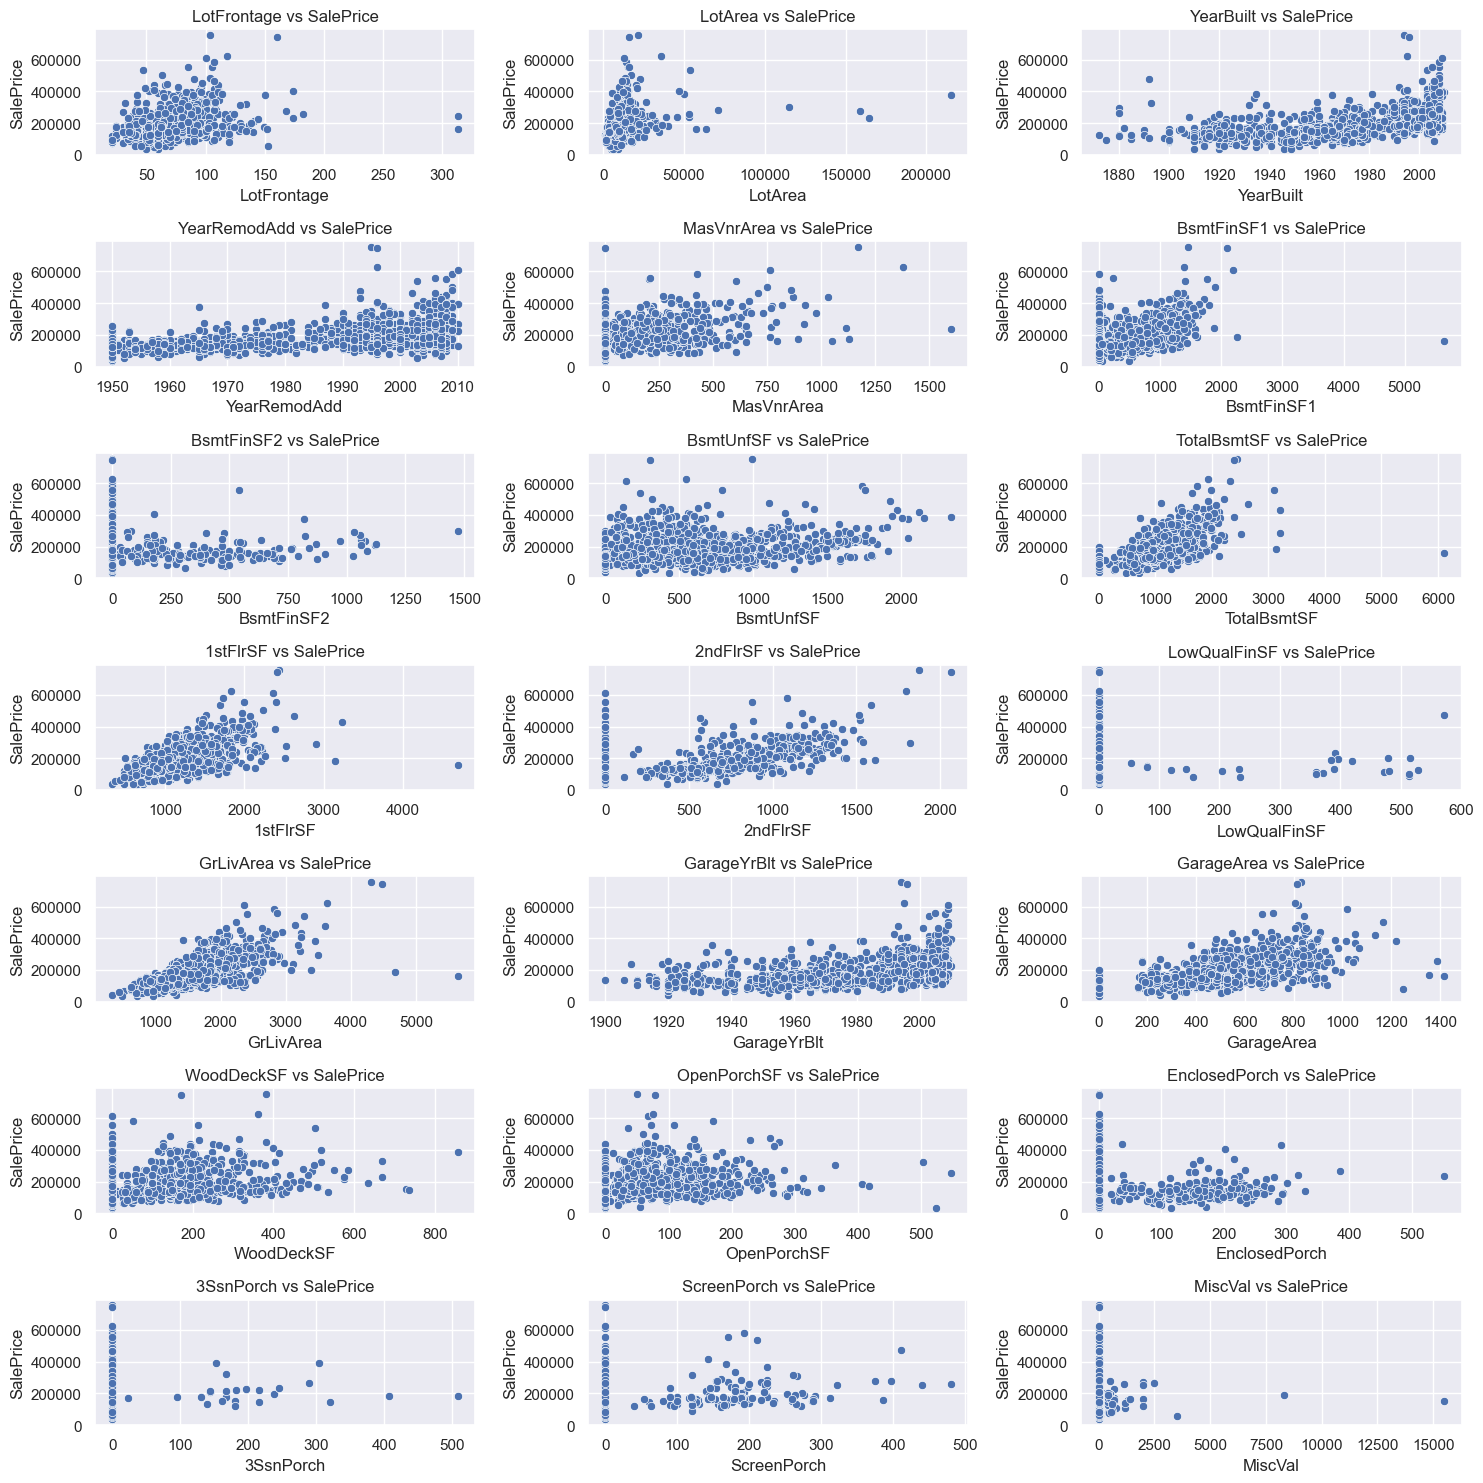

In [45]:
# Configurar o estilo do Seaborn
sns.set()

# Definir o número de subplots por linha e o tamanho da figura
subplots_per_row = 3
figsize = (15, 15)

# Obter todas as colunas de atributos do dataframe train (exceto a última coluna)
attribute_columns = train[continuous_quantitative].columns[:-1]

# Calcular o número total de subplots
num_subplots = len(attribute_columns)

# Calcular o número de linhas
num_rows = (num_subplots - 1) // subplots_per_row + 1

# Criar a figura e os subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=figsize)

# Converter a matriz de subplots em um array unidimensional
axes = axes.flatten()

# Iterar sobre os atributos e criar os gráficos de dispersão
for i, attribute in enumerate(attribute_columns):
    # Selecionar o subplot atual
    ax = axes[i]
    
    # Criar o gráfico de dispersão
    sns.scatterplot(x=attribute, y=train.columns[-1], data=train, ax=ax)
    
    # Definir o título do gráfico
    ax.set_title(f'{attribute} vs SalePrice')
    
    # Definir o nome do eixo y como o nome do atributo alvo
    ax.set_ylabel(train[continuous_quantitative].columns[-1])
    
# Remover os subplots vazios, se houverem
if num_subplots < len(axes):
    for j in range(num_subplots, len(axes)):
        fig.delaxes(axes[j])

# Ajustar o espaçamento entre os subplots
fig.tight_layout()

# Exibir o gráfico
plt.show()

Observamos que há muitas variáveis que apresentam valores em grande quantidade no 0. Uma abordagem para isso seria a discretização dessas variáveis em valores: nulos e não nulos. No projeto, foi decidido manter com essas variáveis sendo contínuas.

- Histogramas

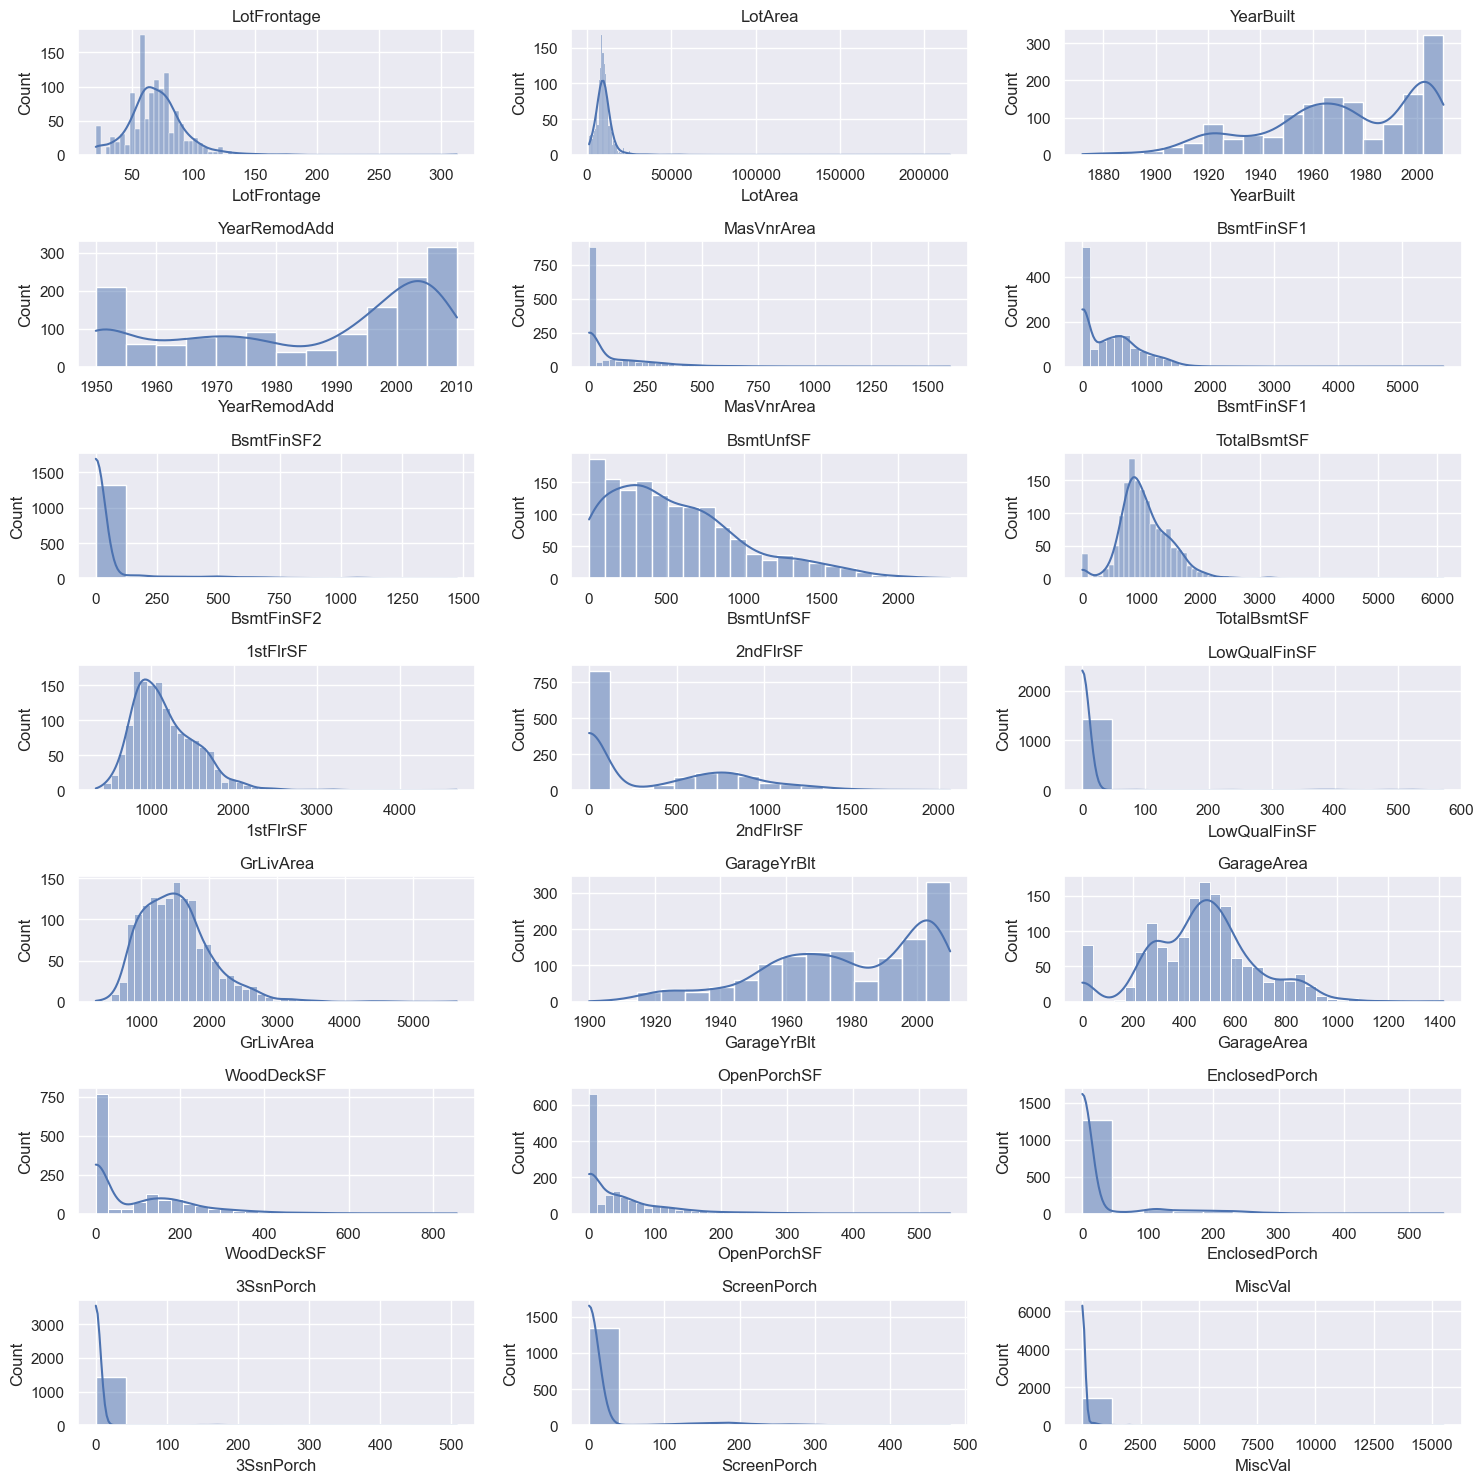

In [46]:
# Configurar o estilo do Seaborn
sns.set()

# Definir o número de subplots por linha e o tamanho da figura
subplots_per_row = 3
figsize = (15, 15)

# Obter todas as colunas de atributos do dataframe train (exceto a última coluna)
attribute_columns = train[continuous_quantitative].columns[:-1]

# Calcular o número total de subplots
num_subplots = len(attribute_columns)

# Calcular o número de linhas
num_rows = (num_subplots - 1) // subplots_per_row + 1

# Criar a figura e os subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=figsize)

# Converter a matriz de subplots em um array unidimensional
axes = axes.flatten()

# Iterar sobre os atributos e criar os histogramas com as curvas de distribuição
for i, attribute in enumerate(attribute_columns):
    # Selecionar o subplot atual
    ax = axes[i]
    
    # Criar o histograma com a curva de distribuição
    sns.histplot(data=train, x=attribute, kde=True, ax=ax)
    
    # Definir o título do subplot
    ax.set_title(attribute)
    
# Remover os subplots vazios, se houverem
if num_subplots < len(axes):
    for j in range(num_subplots, len(axes)):
        fig.delaxes(axes[j])

# Ajustar o espaçamento entre os subplots
fig.tight_layout()

# Exibir o gráfico
plt.show()

#### Análise de correlação:
Explora-se a relação entre diferentes variáveis quantitativas por meio de medidas de correlação, como o coeficiente de correlação de Pearson. Isso ajuda a identificar a força e a direção da relação entre as variáveis.

<Axes: title={'center': 'Matriz de correlação entre as variáveis numéricas.'}>

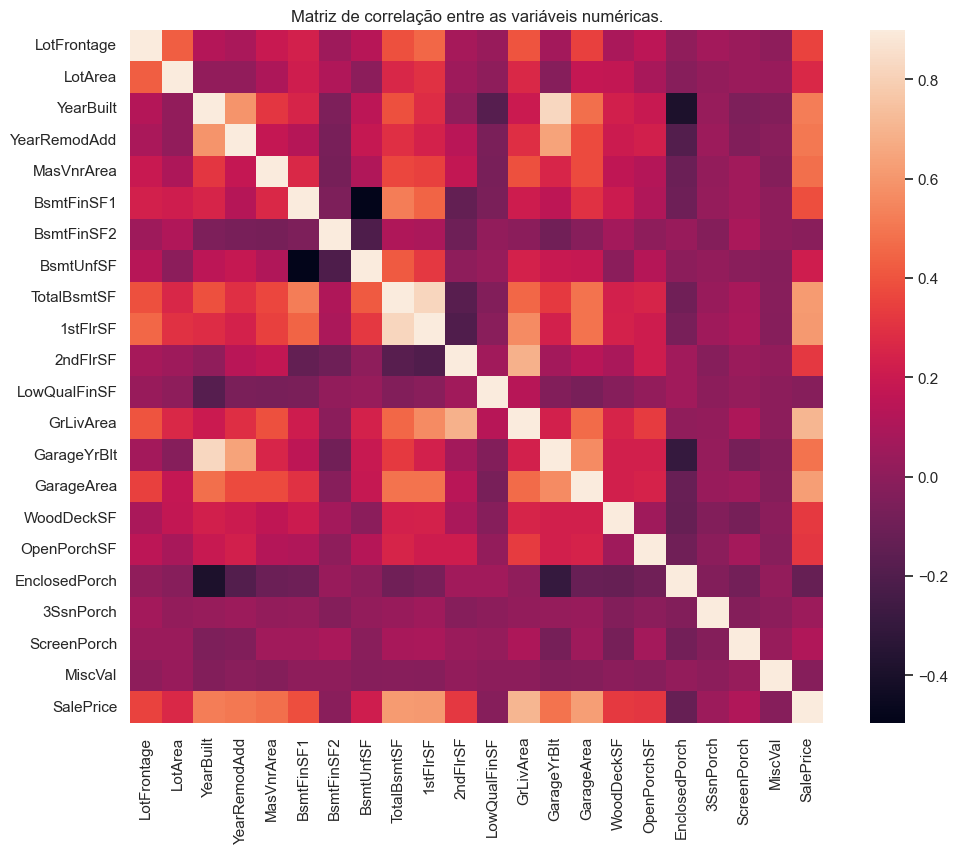

In [47]:
corr_matrix = train[continuous_quantitative].corr()
plt.subplots(figsize=(12,9))
plt.title('Matriz de correlação entre as variáveis numéricas.')
sns.heatmap(corr_matrix, vmax=0.9, square=True)

Vamos ver quais variáveis tem correlação alta com o nosso alvo: _SalesPrice_:

In [48]:
# correlação entre as variáveis numéricas e o preço:
corr_matrix['SalePrice'].sort_values(ascending=False).head(12)

SalePrice       1.000000
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
Name: SalePrice, dtype: float64

Intuitivamente falando, é provavel que as variáveis mais correlacionadas tenham maior poder preditivo sobre o preço. Entretando devemos verificar se há correlação entre elas mesmas, para fins de simplificação, vamos pegar os atributos cuja correlação seja maior que $0.5$

<Axes: title={'center': 'Matriz de correlação entre as variáveis numéricas com correlação maior que 0.5.'}>

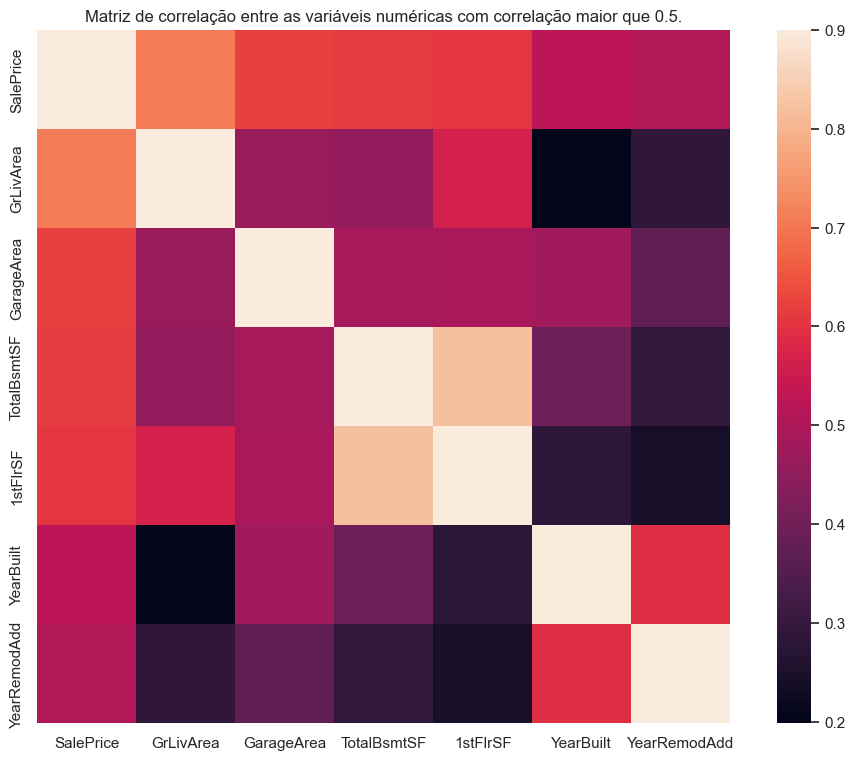

In [49]:
#atributos com correlação maior que 0.5:
features_correlated = corr_matrix['SalePrice'].sort_values(ascending=False).loc[lambda x : x > 0.5].index

#plotar a correlação entre as  variáveis com correlação maior que 0.5:
corr_matrix = train[features_correlated].corr()
plt.subplots(figsize=(12,9))
plt.title('Matriz de correlação entre as variáveis numéricas com correlação maior que 0.5.')
sns.heatmap(corr_matrix, vmax=0.9, square=True)


Observamos que algumas variáveis são fortemente correlacionadas: 
-  _GarageArea_ e _GarageCars_ : Faz sentido se pensar que o aumento do numero de carros na garagem exige uma garagem maior.

- _TotalBsmtSF_ e _1stFlrSF_: A relação entre o total de metragem do imovel com a metragem do primeiro andar também é pertinente.

- _TotRmsAbvGrd_ e _GrLivArea_: O número total de salas em relação ao tamanho da sala de estar também é pertinente


Portanto vamos deletar _1stFlrSF_, _GarageArea_ e _GrLivArea_ (Escolhidos de forma arbitrária).

In [50]:
# remover as variáveis com correlação maior que 0.5:
features_correlated = features_correlated.drop(['GarageArea', '1stFlrSF', 'GrLivArea'])
train = train.drop(['GarageArea', '1stFlrSF', 'GrLivArea'], axis='columns')
# test = test.drop(['GarageArea', '1stFlrSF', 'GrLivArea'], axis='columns')

In [51]:
train[features_correlated].dtypes

SalePrice       int64
TotalBsmtSF     int64
YearBuilt       int64
YearRemodAdd    int64
dtype: object

In [52]:
# Determina novamente os atributos numéricos após a exclusão de dados
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns

# Determina os atributos quantitativos discretos e continuos

discreet_quantitative = []
continuous_quantitative = []
for column in train[numerical_features].columns:
    unique_values = train[numerical_features][column].nunique()
    if unique_values <= 16:
        discreet_quantitative.append(column)
    else:
        continuous_quantitative.append(column)    

# Exibe as colunas selecionadas
print(discreet_quantitative)
print("Quantidade de atributos discretos: ", len(discreet_quantitative))
print(continuous_quantitative)
print("Quantidade de atributos contínuos: ", len(continuous_quantitative))

['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold']
Quantidade de atributos discretos:  15
['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']
Quantidade de atributos contínuos:  19


#### Identificação de outliers: 

Vamos verificar se há valores outliers nos atributos e vamos realizar o tratamento deles. Inicialmente iremos fazer uma inspeção visual por meio do plot de boxplots

##### Identificando Outlier com Z- Score
O z-score nos da uma idéia do quanto um determinado ponto está afastado da média dos dados, isto é , ele mede quantos desvios padrão abaixo ou acima da média populacional ou amostral os dados estão:
$$
z=\frac{x-\mu}{\sigma}
$$
Onde:
- x: observação
- $\mu$: média
- $\sigma$: desvio padrão
Assumindo uma distribuição normal, sabe-se que 99,7% dos dados estão à uma distância de três desvios padrão da média. Com base nisso, será considerado nesse trabalho que dados com distância acima de três desvios padrão serão considerados outliers.

##### Identificando Outlier com Amplitude interquartil

Percentil:

- percentil 25 : primeiro quaril
- percentil 50 : segundo quartil ou mediana
- percentil 75 : terceito quartil

Amplitude interquartil:

É Diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1)
Para identificar Outlier rom amplitude interquartil serão realizados os procedimentos abaixo:
1. Ordenar os dados de forma crescente;
2. Calcular o valor do primeiro e terceiro quartil
3. Determinar a amplitude interquartil
4. Encontrar o limite inferior =  Q1 - 1,5*amplitude interquartil
5. Encontrar o limite superior =  Q3 + 1,5*amplitude interquartil

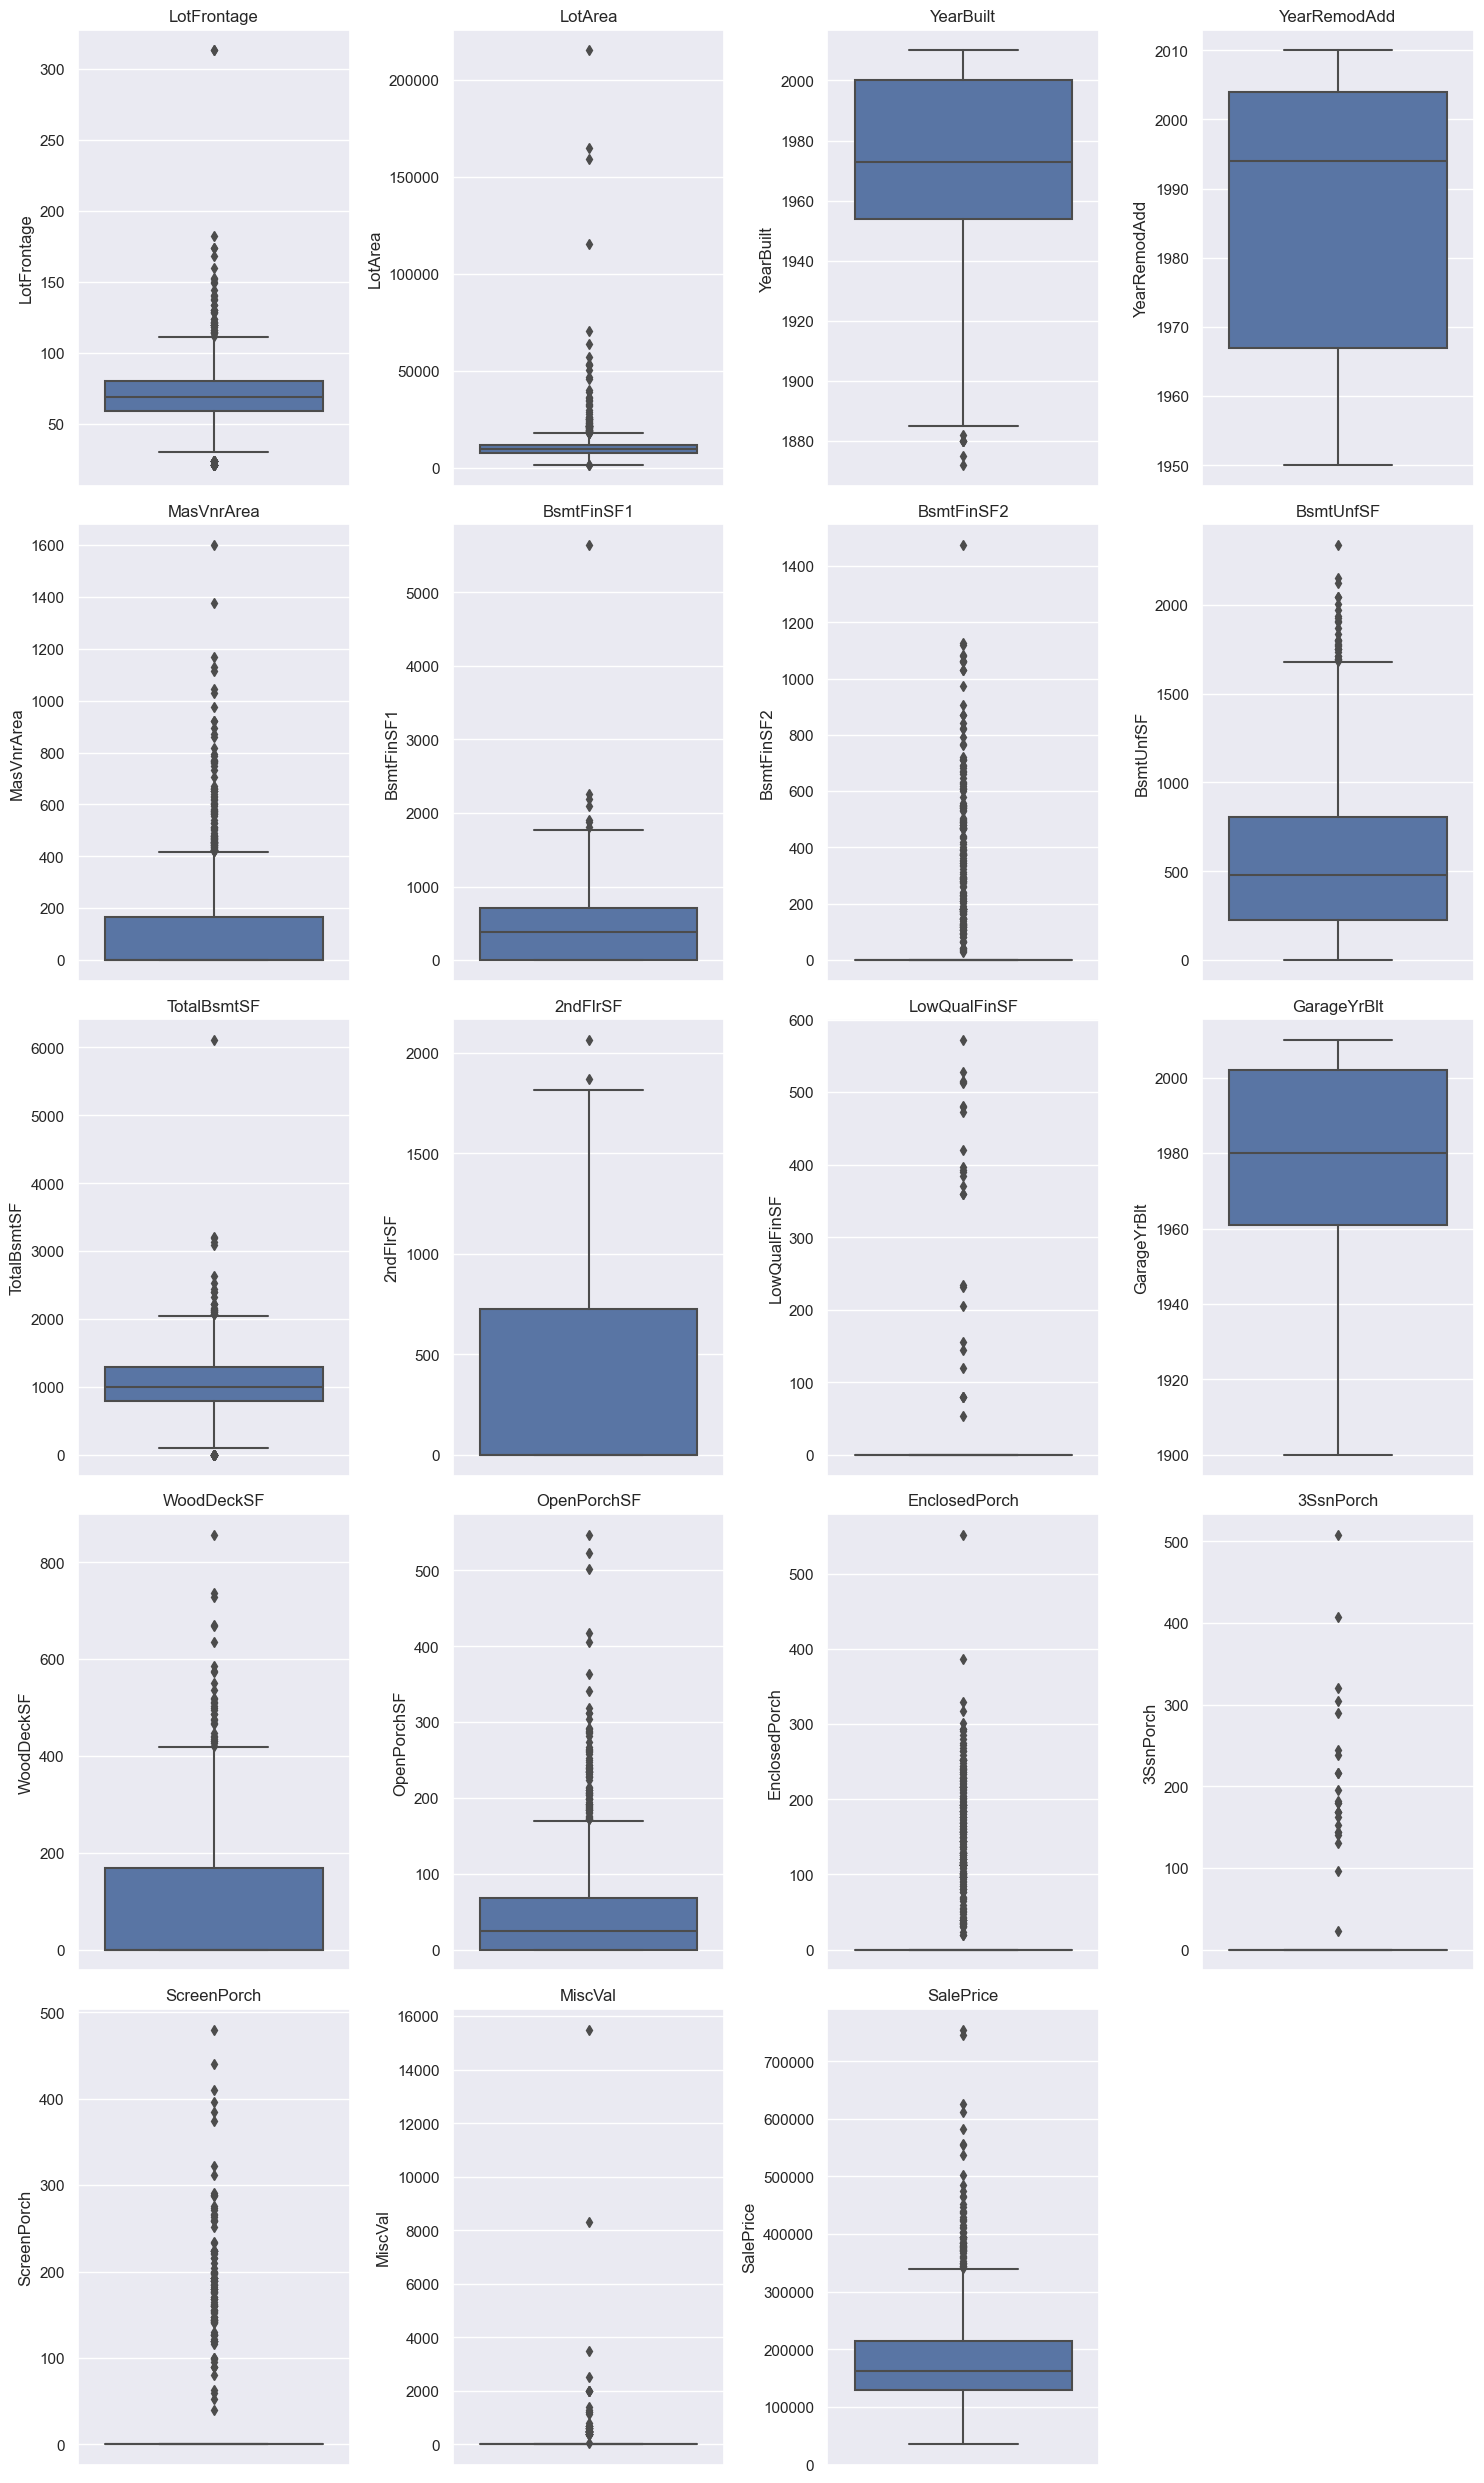

In [53]:
# Configurar o estilo do Seaborn
sns.set()

# Configurar o layout dos subplots
n = 4 # Número de subplots por linha
num_features = len(continuous_quantitative)
num_subplots = num_features // n + (num_features % n > 0)
fig, axes = plt.subplots(num_subplots, 4, figsize=(15, num_subplots * 5))

# Iterar sobre as features numéricas (exceto a coluna do atributo alvo)
for i, feature in enumerate(continuous_quantitative):
    ax = axes[i // n, i % n]  # Acessar o subplot correspondente
    sns.boxplot(y=train[feature], ax=ax, orient='v')  # Plotar boxplot na vertical
    ax.set_title(feature)  # Definir o título do subplot

# Remover subplots vazios, se necessário
if num_features % n != 0:
    for i in range(num_features % n, n):
        fig.delaxes(axes[-1, i])

# Ajustar o espaçamento entre os subplots
fig.tight_layout()

# Exibir o gráfico
plt.show()

Há diversas variáveis que possuem mais de $75\%$ de valores nulos (igual a zero), dessa forma o modelo pode criar viés em cima desses dados desbalanceados. Por decisão de projeto, decidimos retirar esses atributos.

In [54]:
# selecionar atributos que tem no mínimo 75% de valores no zero:
features_with_zeros = []
for column in train[continuous_quantitative].columns:
    if (train[column].value_counts(normalize=True).head(1) > 0.75).bool():
        features_with_zeros.append(column)

E

In [55]:
train = train.drop(features_with_zeros, axis='columns')

In [56]:
# # Criar novo DataFrame com as colunas numéricas
# train_IQR = train[continuous_quantitative]

# # Calcular o IQR e identificar outliers
# for col in continuous_quantitative[:-1]:
#     Q1 = train_IQR[col].quantile(0.25)
#     Q3 = train_IQR[col].quantile(0.75)
#     IQR = Q3 - Q1
    
#     limIn = Q1 - (IQR * 1.5)
#     limSp = Q3 + (IQR * 1.5)
    
#     # Substituir outliers por np.nan
#     train_IQR.loc[(train_IQR[col] < limIn) | (train_IQR[col] > limSp), col] = np.nan

# # Criar imputador KNN
# imputer = KNNImputer(n_neighbors=15, weights='uniform', metric='nan_euclidean')

# # Ajustar imputador aos dados
# imputer.fit(train_IQR)

# # Imputar valores ausentes
# train_IQR = pd.DataFrame(imputer.transform(train_IQR), columns=train_IQR.columns)


#### Imputando valores aos outliers
Em ambos os métodos acima, foram identificados os outliers e para cada um deles foi atribuido um valor ausente, ou seja, eles foram excluidos dos dados.
Para preencher os dados ausentes foi utilizada uma técnica de imputação de valores com base em proximidade, denominada KNN. O imputador KNN (K-Nearest Neighbors) é uma técnica dque pode ser utilizada para preencher valores ausentes em conjuntos de dados. Ele é um algoritmo de aprendizado de máquina capaz de prever valores ausentes com base na similaridade entre as amostras do conjunto de dados.

Inicialmente ele encontra os K vizinhos mais próximos (específicamente 15 nesse trabalho) para cada valor ausente, calculando a distância entre a amostra com valor ausente e todas as outras amostras no conjunto de dados. Ele seleciona as K amostras mais próximas com base em uma métrica de distância que, neste caso, é a distância euclidiana.

Em seguida, o KNN calcula um valor imputado para o valor ausente com base na média arimética dos valores dos vizinhos (vizinhos com pesos iguais). Por fim, o valor imputado é atribuído a cada valor ausente no conjunto de dados.

#### Análise Exploratória para Dados Qualitativos:
Inicialmente vamos converter os atributos do tipo 'object' para 'category'

In [57]:
# Selecionar as colunas do tipo 'object'
object_columns = train.select_dtypes(include='object').columns

# Converter as colunas para o tipo 'category'
train[object_columns] = train[object_columns].astype('category')

In [58]:
# categorical = train.columns[~train.columns.isin(train[continuous_quantitative].columns)]

In [59]:
from functions.disc_cont_cat import disc_cont_cat

discrete, continuous, categorical = disc_cont_cat(train, 'SalePrice')


There are 11 discrete variables
There are 16 continuous variables
There are 37 categorical variables


Após isso, vamos selecionar os dados qualitativos


Para dados qualitativos, que envolvem atributos ou categorias, a análise exploratória pode envolver os seguintes aspectos:

#### Frequência e distribuição: 
Calculam-se as frequências absolutas e relativas de cada categoria presente nos dados qualitativos. Isso permite entender a distribuição e proporções de cada categoria.

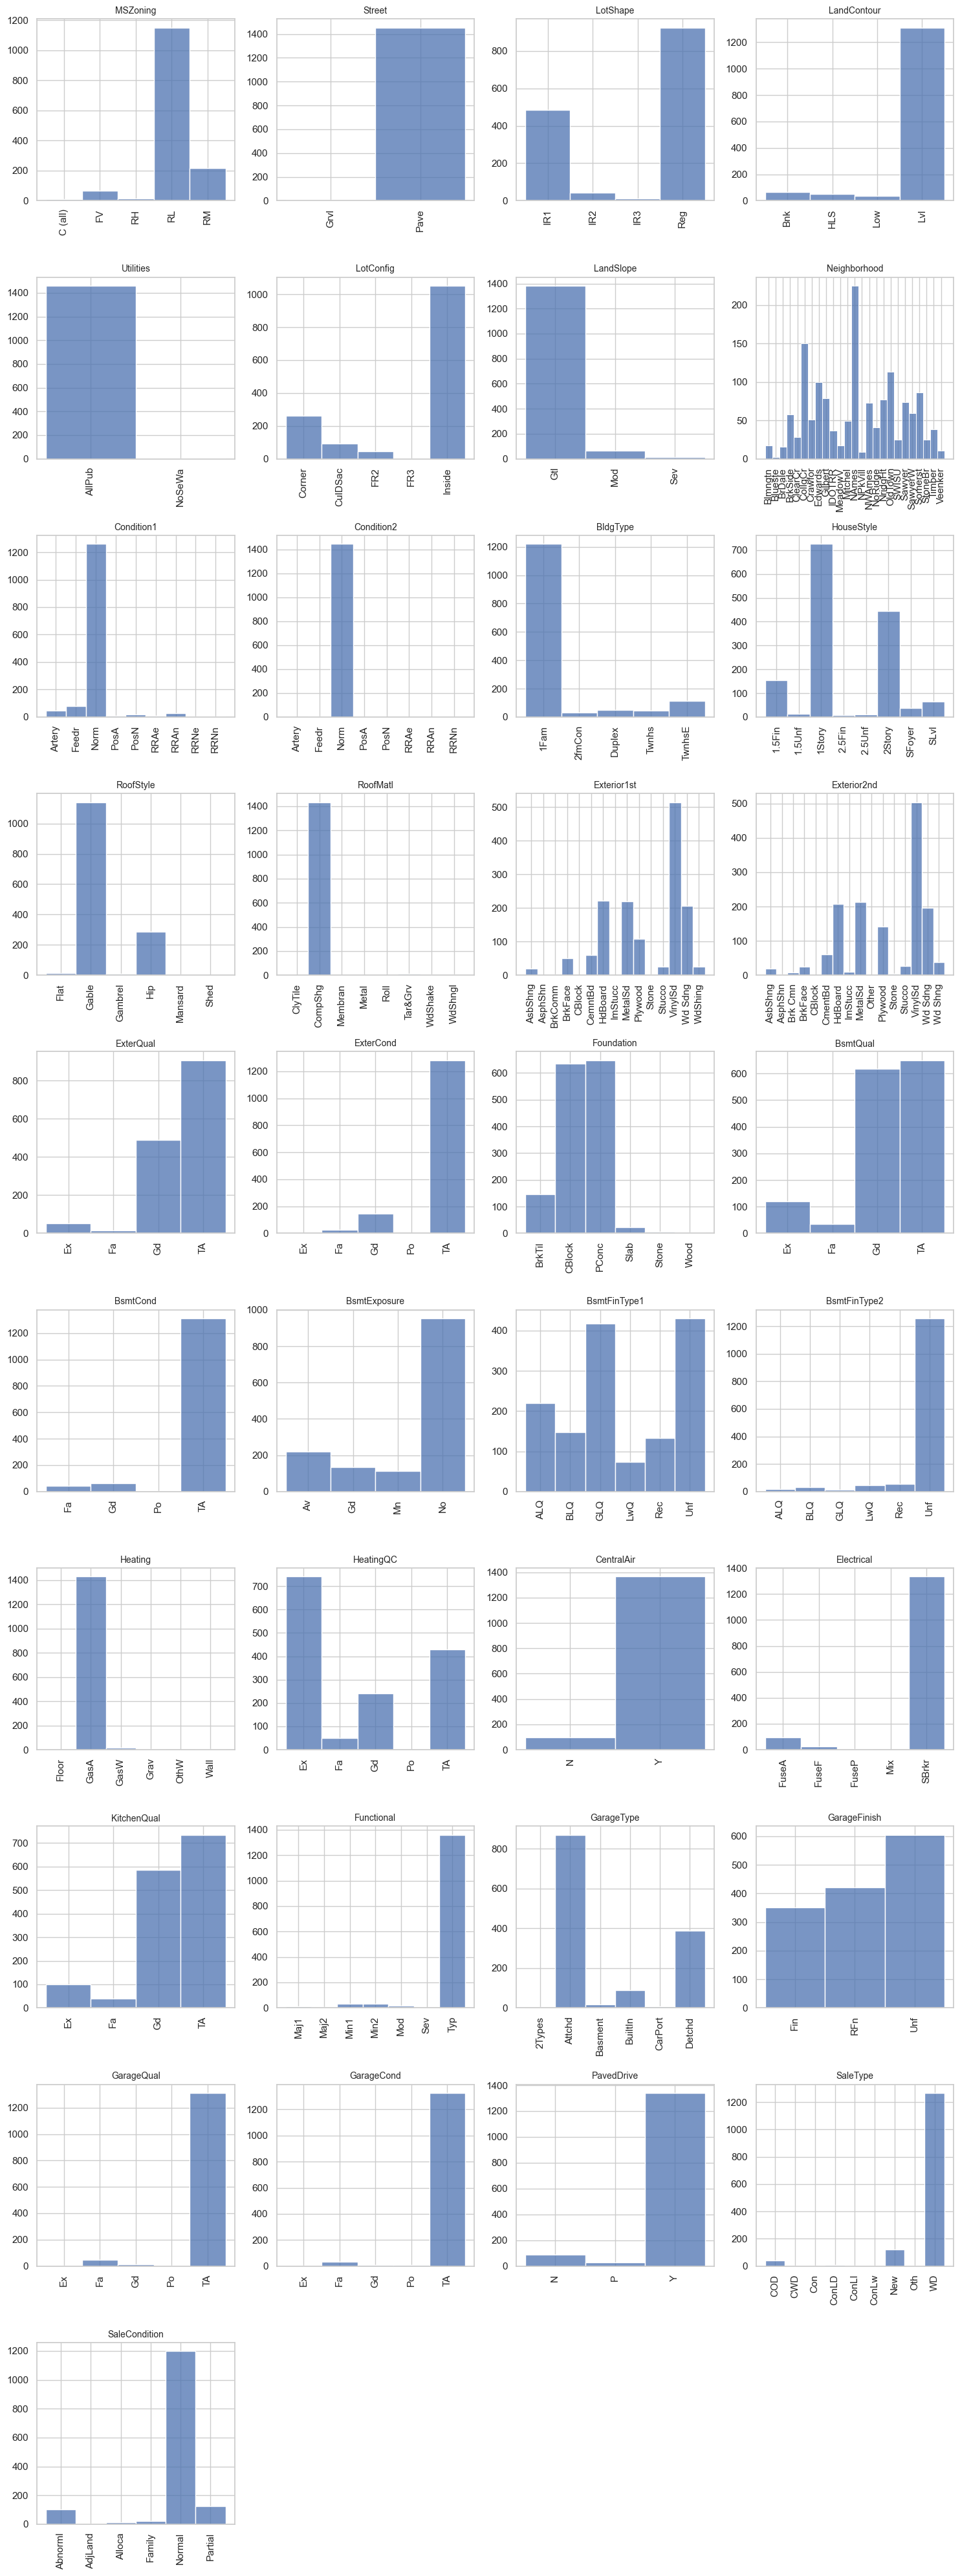

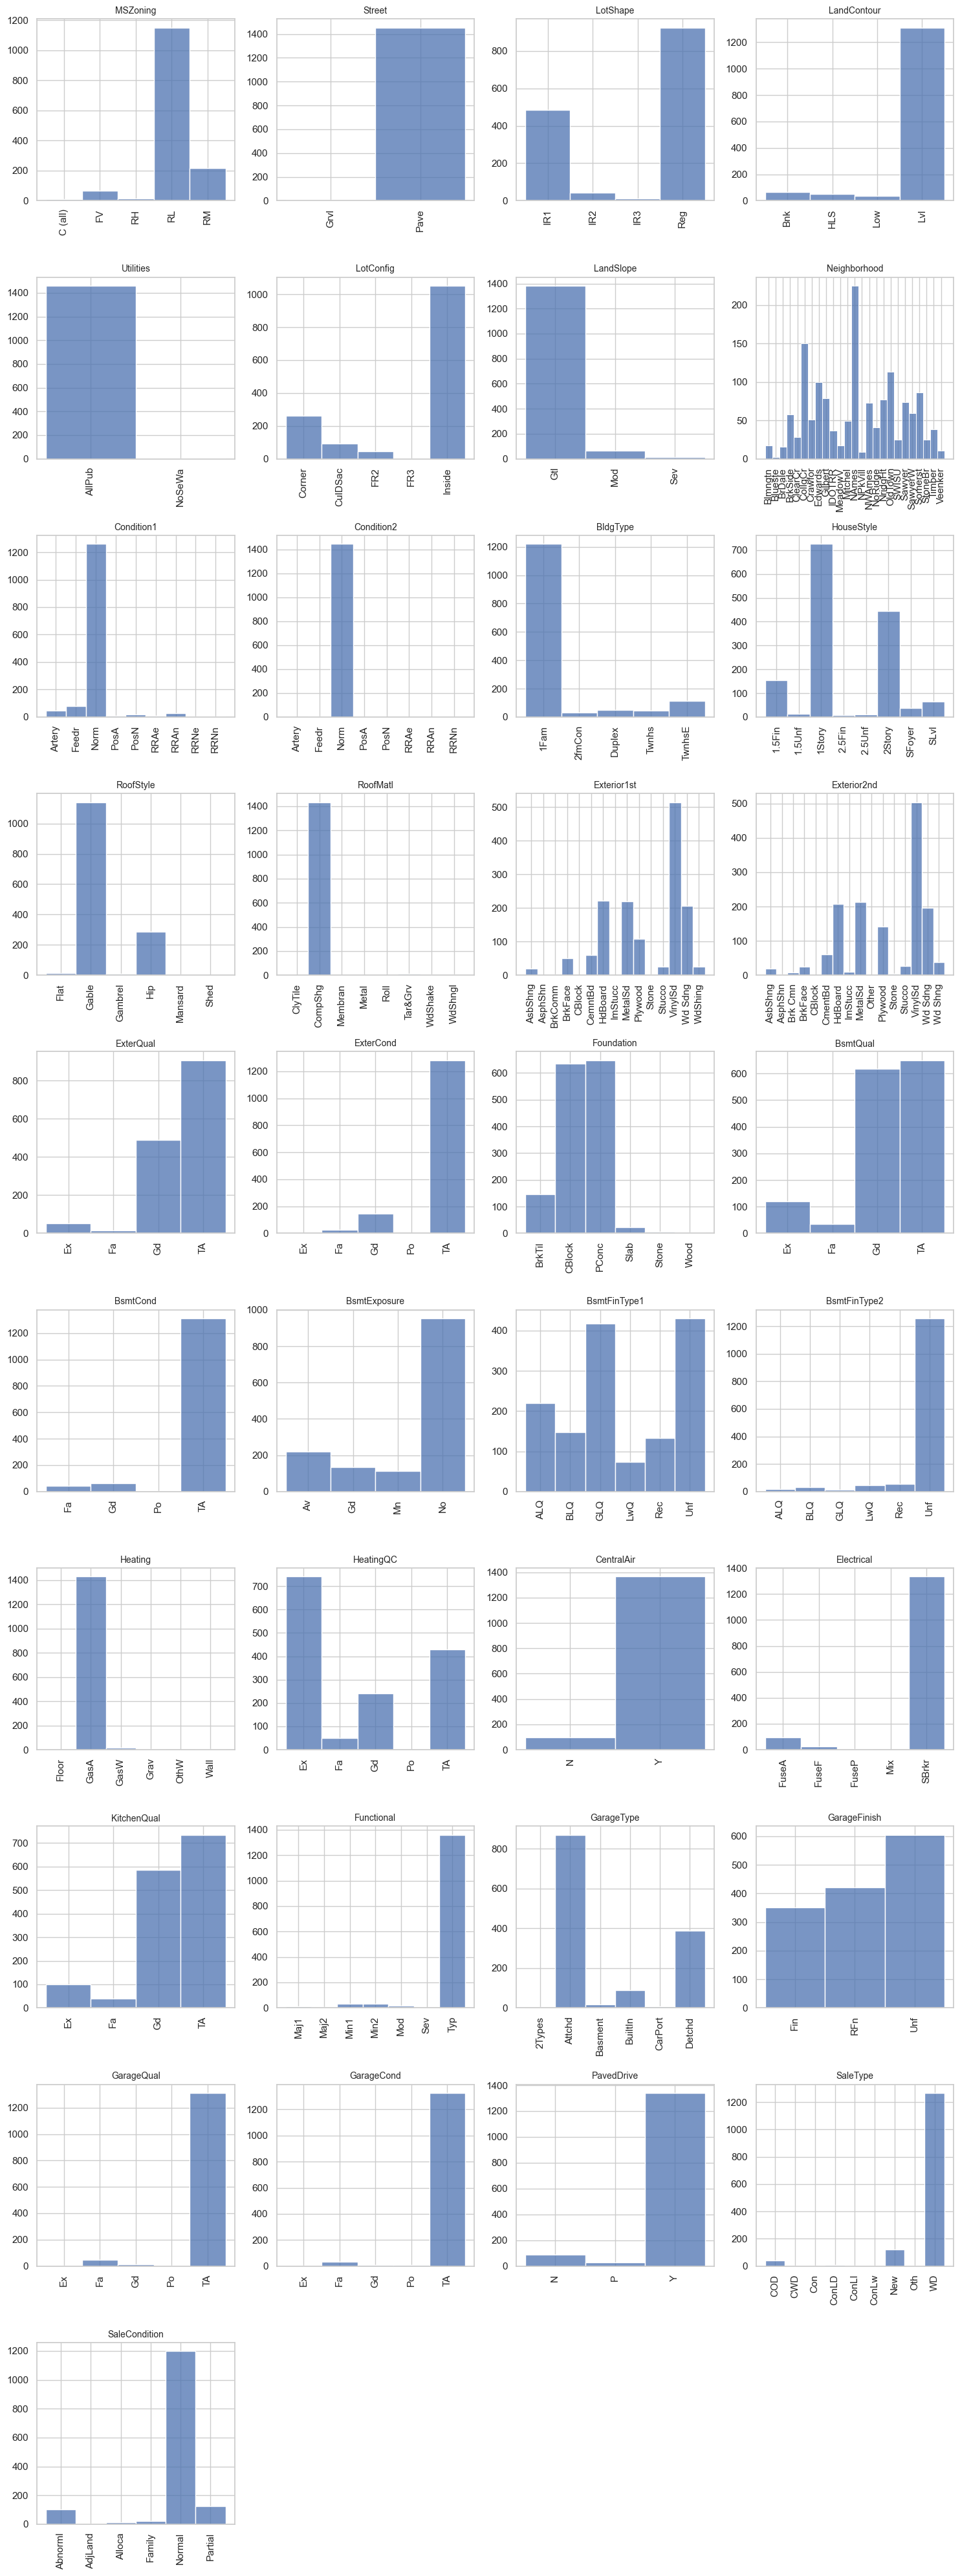

In [60]:

# Dividindo os atributos em duas metades
half = len(train[categorical]) // 2
first_half = train[categorical][:half]
second_half = train[categorical][half:]

# Configurações do estilo seaborn
sns.set(style='whitegrid')

# Configuração dos subplots para a primeira metade dos atributos
num_first_half = len(first_half.columns)
num_rows_first_half = (num_first_half - 1) // 4 + 1
fig, axes = plt.subplots(nrows=num_rows_first_half, ncols=4, figsize=(15, 4*num_rows_first_half))

# Plotagem dos histogramas para a primeira metade dos atributos
for i, col in enumerate(first_half.columns):
    ax = axes[i // 4, i % 4]
    sns.histplot(data=train, x=col, ax=ax, stat='count', discrete=True)
    ax.set_title(col, fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Definir as etiquetas do eixo x na vertical
    ax.tick_params(axis='x', rotation=90)
    

# Remover subplots vazios, se houverem
if num_first_half < num_rows_first_half * 4:
    for i in range(num_first_half, num_rows_first_half * 4):
        fig.delaxes(axes[i // 4, i % 4])

# Ajuste de espaçamento entre subplots
plt.tight_layout()

# Configuração dos subplots para a segunda metade dos atributos
num_second_half = len(second_half.columns)
num_rows_second_half = (num_second_half - 1) // 4 + 1
fig, axes = plt.subplots(nrows=num_rows_second_half, ncols=4, figsize=(15, 4*num_rows_second_half))

# Plotagem dos histogramas para a segunda metade dos atributos
for i, col in enumerate(second_half.columns):
    ax = axes[i // 4, i % 4]
    sns.histplot(data=train, x=col, ax=ax, stat='count', discrete=True)
    ax.set_title(col, fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Definir as etiquetas do eixo x na vertical
    ax.tick_params(axis='x', rotation=90)
    

# Remover subplots vazios, se houverem
if num_second_half < num_rows_second_half * 4:
    for i in range(num_second_half, num_rows_second_half * 4):
        fig.delaxes(axes[i // 4, i % 4])

# Ajuste de espaçamento entre subplots
plt.tight_layout()

# Exibição dos plots
plt.show()

#### Distribuição do atributo alvo em relação aos demais atributos

A distribuição do atributo alvo em relação aos demais atributos refere-se à relação entre a variável alvo (também conhecida como variável dependente, resposta ou variável a ser prevista) e as outras variáveis do conjunto de dados (também conhecidas como variáveis independentes, preditoras ou explicativas).

Essa análise busca compreender como a distribuição ou os valores da variável alvo variam ou são influenciados pelas diferentes categorias ou níveis das outras variáveis. Em outras palavras, examina-se como a variável alvo se comporta em relação a diferentes valores ou grupos das outras variáveis.

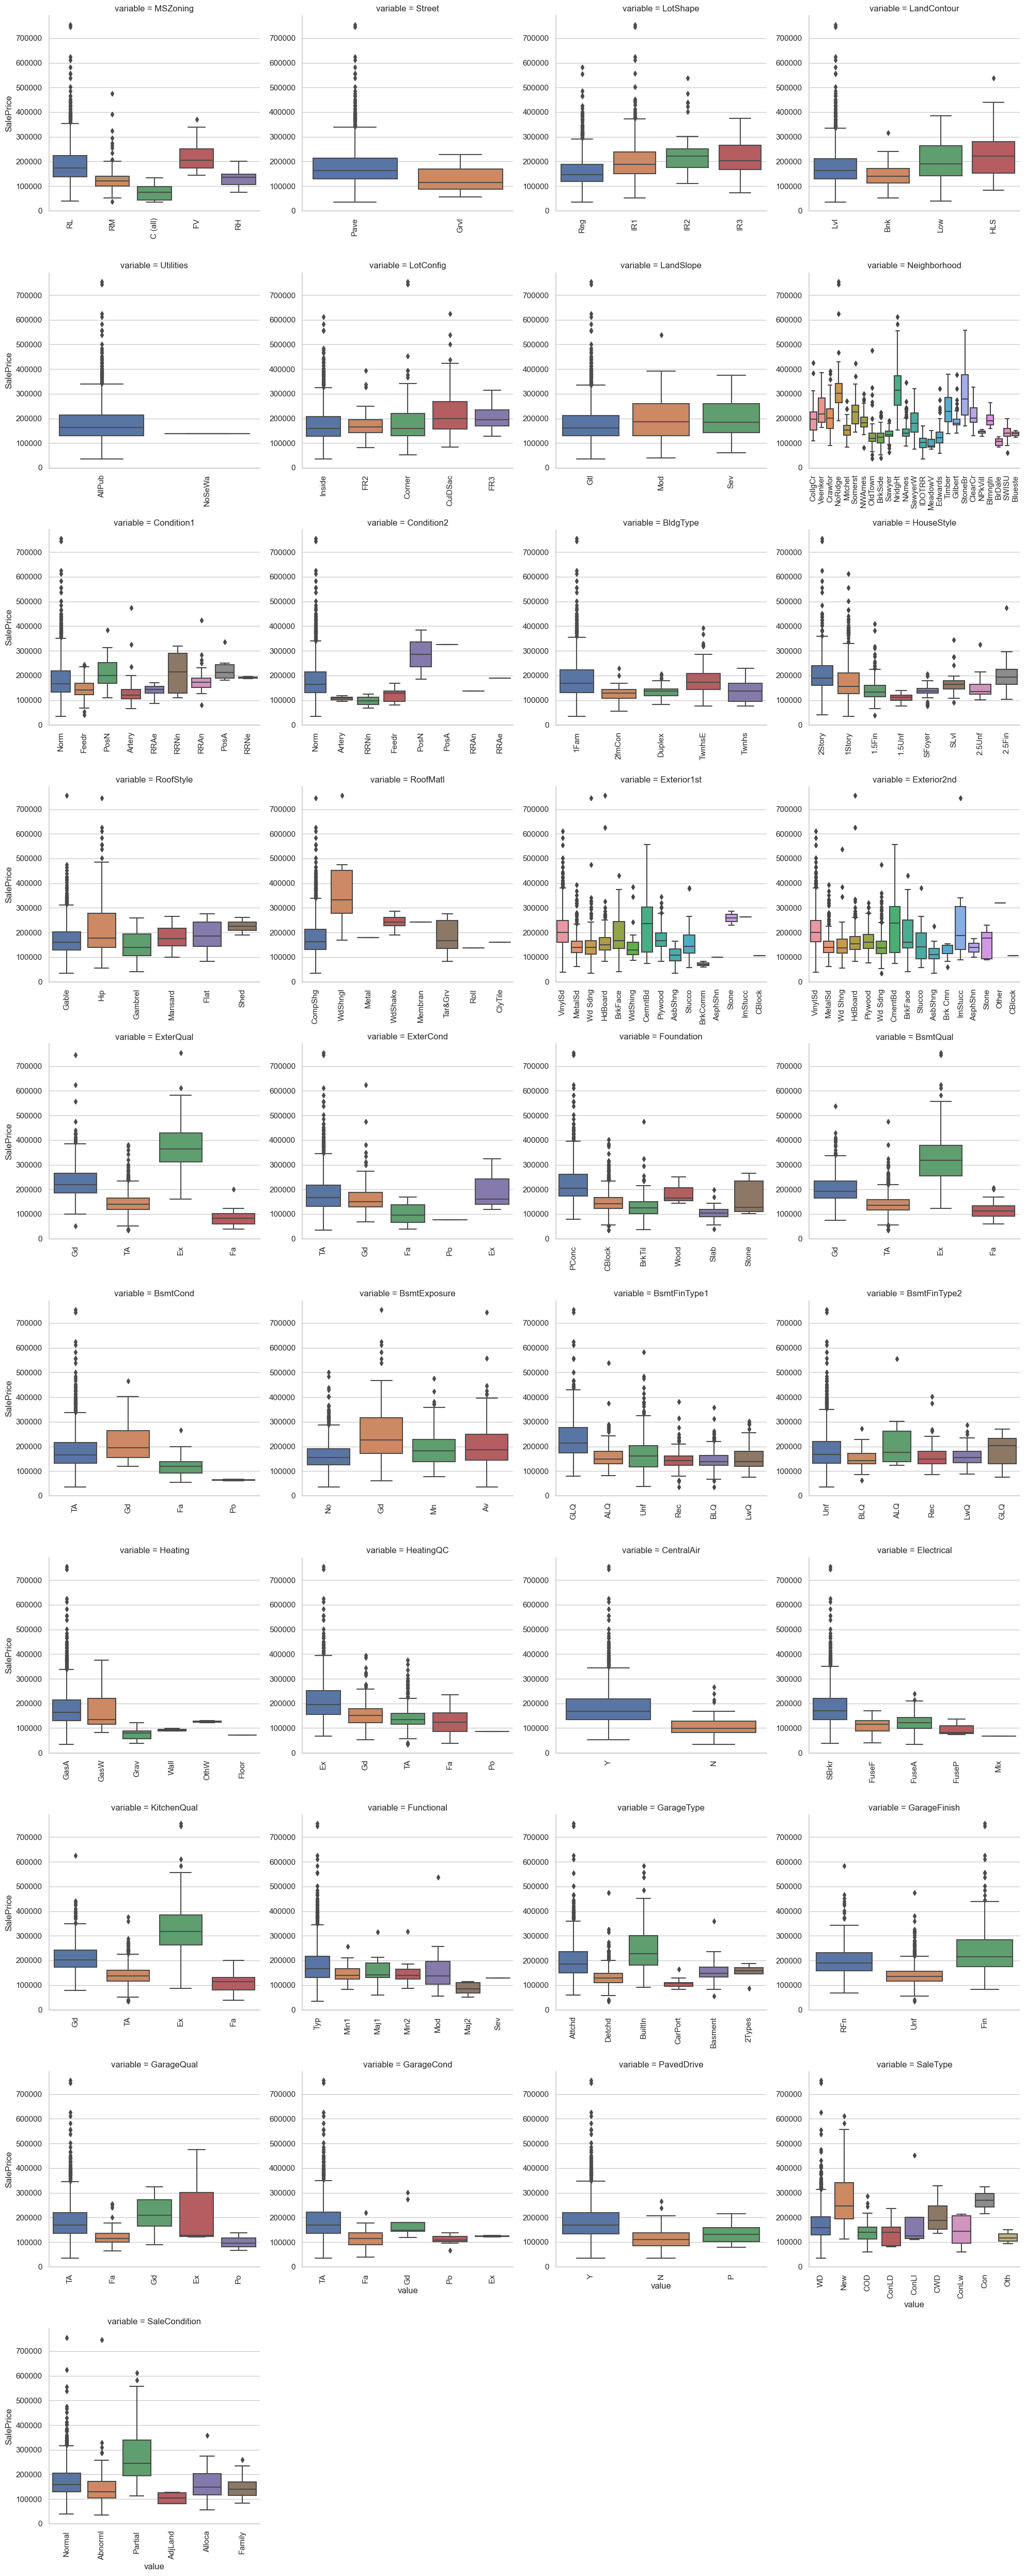

In [61]:
# Converter atributos qualitativos para tipo categórico

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    plt.xticks(rotation=90)

# Derreter o DataFrame
melted = pd.melt(train, id_vars=['SalePrice'], value_vars=categorical)

# Configurar o FacetGrid para os boxplots
g = sns.FacetGrid(melted, col="variable", col_wrap=4, sharex=False, sharey=False, height=5)

# Mapear a função boxplot no FacetGrid
g.map(boxplot, "value", "SalePrice")

# Exibir os plots
plt.show()





A partir desses gráficos, não é possível tirarmos conclusões imediatas a partir da distribuição da variável alvo em relação a cada categoria dos atributos.Entretanto, análise realizada de alguns atributos permite inferir a faixa de preço do atributo alvo com base na categoria do atributo analisado como observado nos atributos:_ExterQual_ e _KitchenQual_ , pois os _BoxPlots_ se distribuem de forma espaça entre si.

# Separar Conjunto Treino / Teste:


In [62]:
from sklearn.model_selection import train_test_split

X = train.drop(['SalePrice'], axis=1).copy()
Y = train['SalePrice'] # here we need to remove unnacessary columns if exist

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=1)

# Critérios de Seleção de atributos:

#### Análise de variância (ANOVA) 

A ANOVA é um teste estatístico utilizado para comparar a média de um grupo com a média de outros grupos, permitindo determinar se existem diferenças significativas entre os grupos. No gráfico do ANOVA, a disparidade (disparity) é representada no eixo y em uma escala logarítmica. Valores mais altos indicam uma maior disparidade entre as categorias da variável qualitativa em relação à variável de resposta (SalePrice no caso desse código).

Em termos práticos, uma disparidade alta indica que as categorias da variável qualitativa têm uma influência significativa na variável de resposta e podem ser consideradas importantes para explicar as variações nos valores da variável de resposta. Isso sugere que a variável qualitativa pode ser um bom preditor da variável de resposta.

Por outro lado, uma disparidade baixa indica que as categorias da variável qualitativa têm pouca influência ou não são estatisticamente significativas na explicação das variações na variável de resposta. Isso sugere que a variável qualitativa pode não ser relevante ou informativa para prever a variável de resposta.

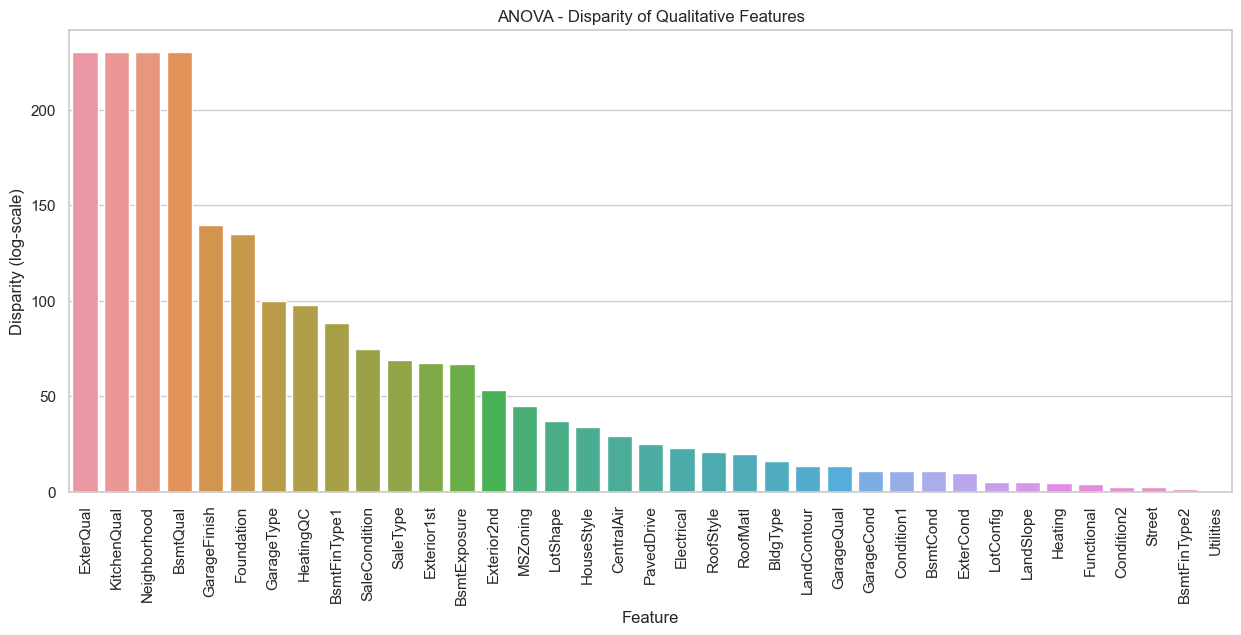

In [63]:
anv = pd.DataFrame()
group_XY_train = train_X.copy()
group_XY_train['SalePrice'] = train_Y
anv['feature'] = group_XY_train[categorical].columns
pvals = []
for c in group_XY_train[categorical].columns:
    samples = []
    for cls in group_XY_train[group_XY_train[categorical][c].notnull()][c].unique():
        s = group_XY_train[group_XY_train[categorical][c] == cls]['SalePrice'].values
        samples.append(s)
    pval = stats.f_oneway(*samples)[1]
    pvals.append(pval)
anv['pval'] = pvals
anv['disparity'] = np.log(1. / np.maximum(anv['pval'].values, 1e-100))
anv = anv.sort_values('disparity', ascending=False)
plt.figure(figsize=(15, 6))
sns.barplot(data=anv, x='feature', y='disparity')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Disparity (log-scale)')
plt.title('ANOVA - Disparity of Qualitative Features')
plt.show()


Como critério de seleção de atributos, vamos retirar os Top-5 atributos com menores Disparidades em relação ao alvo.


In [64]:
# Top 5 atributos com menor disparidade:
drop_anova_columns = anv.tail(4)['feature'].values

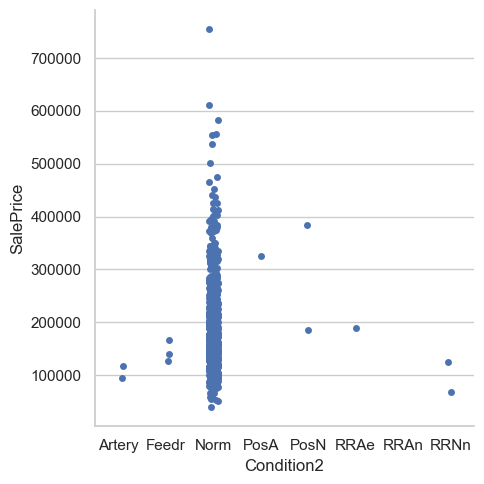

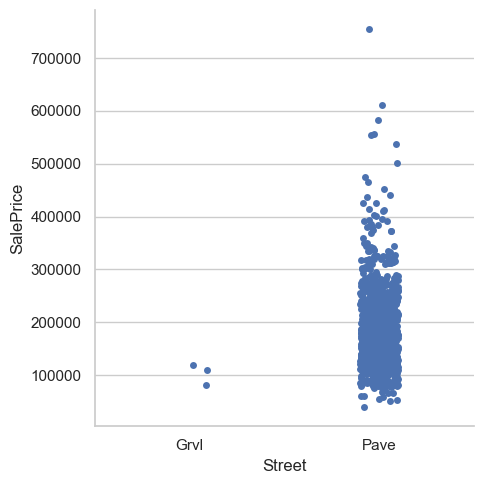

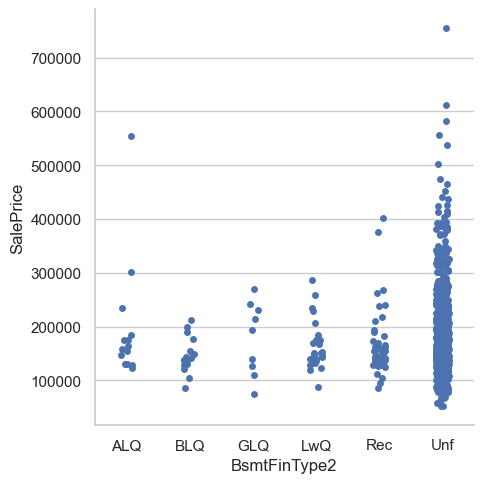

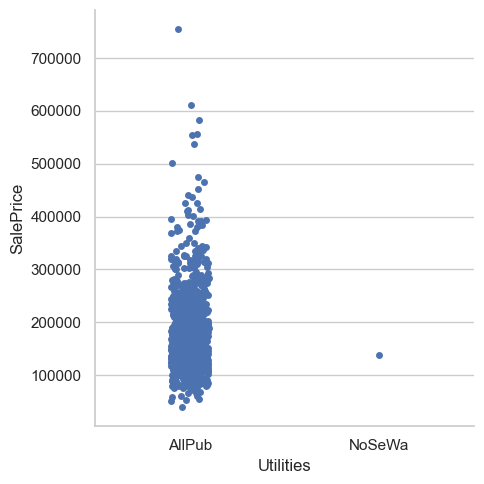

In [65]:
# train["Utilities"].dtypes
for column in drop_anova_columns:
    sns.catplot(x=column, y="SalePrice", data=group_XY_train)

In [66]:
# vamos remover as colunas com baixa Disparidade:

train_X = train_X.drop(drop_anova_columns, axis=1)
test_X = test_X.drop(drop_anova_columns, axis=1)


In [67]:
discrete, continuous, categorical = disc_cont_cat(train_X, train_Y.name)

There are 11 discrete variables
There are 16 continuous variables
There are 33 categorical variables


Vamos usar esse critério para retirar alguns atributos que


#### Teste qui-quadrado:
O teste qui-quadrado, também conhecido como teste de qui-quadrado de Pearson, é um teste estatístico utilizado para determinar se existe uma associação significativa entre duas variáveis categóricas. Ele baseia-se na comparação entre as frequências observadas e as frequências esperadas sob a hipótese nula de que não há associação entre as variáveis. A ideia é verificar se as diferenças observadas entre as frequências são grandes o suficiente para serem consideradas estatisticamente significativas.

O valor de p-value é uma medida estatística que indica a evidência contra a hipótese nula em um teste estatístico. Em geral, ele é usado para avaliar se existe uma associação significativa entre duas variáveis em um teste de independência, como o teste do qui-quadrado.

- Um p-value baixo (geralmente menor que 0,05 ou 0,01) indica que há evidências estatísticas significativas para rejeitar a hipótese nula. Isso sugere que existe uma associação ou diferença estatisticamente significativa entre as variáveis testadas.

- Um p-value alto (geralmente maior que 0,05 ou 0,01) indica que não há evidências suficientes para rejeitar a hipótese nula. Isso sugere que não há uma associação ou diferença estatisticamente significativa entre as variáveis testadas.

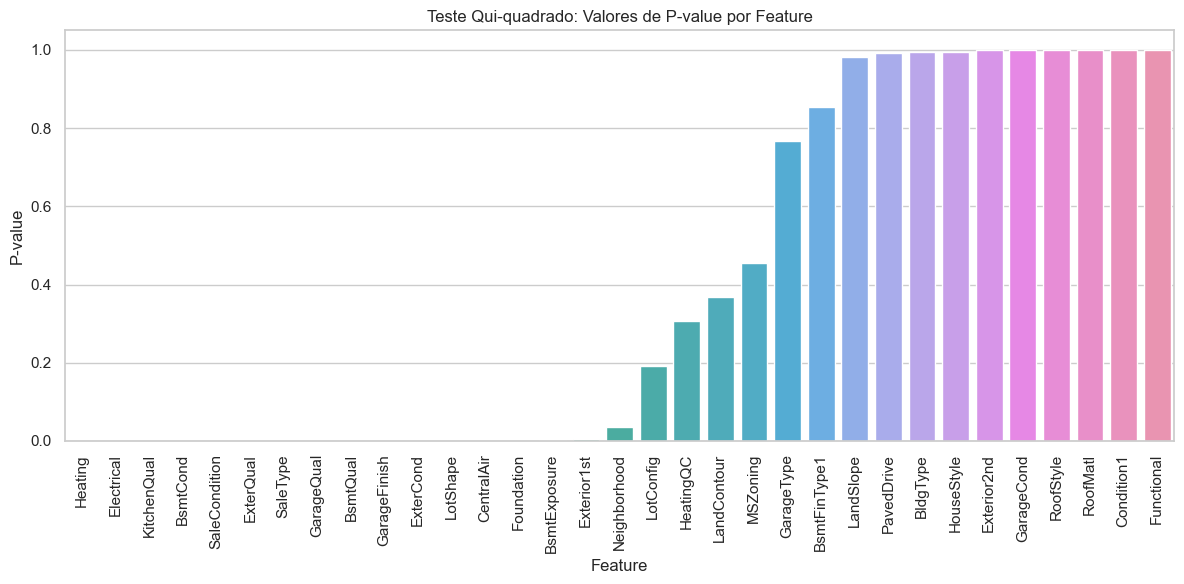

In [69]:
# Realizar o teste qui-quadrado e obter os resultados
results = []
for column in train_X[categorical].columns:
    contingency_table = pd.crosstab(train_X[column], train_Y.values)
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    results.append((column, chi2, p_value))

# Criar um DataFrame com os resultados
results_df = pd.DataFrame(results, columns=['Feature', 'Chi2', 'P-value'])

# Ordenar os resultados pelo valor de p-value (do menor para o maior)
results_df.sort_values(by='P-value', inplace=True)

# Plotar o gráfico de barras dos valores de p-value
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Feature', y='P-value')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('P-value')
plt.title('Teste Qui-quadrado: Valores de P-value por Feature')
plt.tight_layout()
plt.show()

Para o nosso critério de seleção, iremos retirar os 10 atributos com menores $p$-valor e que sejam menores que $0.01$($99\%$ de confiança).

In [78]:
# top 10 atributos com p-value menores que 0.01:
drop_chi2_columns = results_df[results_df['P-value'] < 0.01]['Feature'].values[:10]
print("Quantidade de atributos a ser retirados",len(drop_chi2_columns))
print("atributos retirados",drop_chi2_columns)

train_X = train_X.drop(drop_chi2_columns, axis=1)
test_X = test_X.drop(drop_chi2_columns, axis=1)

In [80]:

discrete, continuous, categorical = disc_cont_cat(train_X, train_Y.name)

There are 11 discrete variables
There are 16 continuous variables
There are 23 categorical variables


as variáveis para o modelo são as seguintes:

# Engenharia de Atributos
Nessa seção vamos realizar insersão de valores, e codificação de atributos

In [82]:
train_X.dtypes

MSSubClass         int64
MSZoning        category
LotFrontage      float64
LotArea            int64
LotShape        category
LandContour     category
LotConfig       category
LandSlope       category
Neighborhood    category
Condition1      category
BldgType        category
HouseStyle      category
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle       category
RoofMatl        category
Exterior1st     category
Exterior2nd     category
MasVnrArea       float64
ExterCond       category
Foundation      category
BsmtExposure    category
BsmtFinType1    category
BsmtFinSF1         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
HeatingQC       category
CentralAir      category
2ndFlrSF           int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Functional      category
Fireplaces         int64


## Valores faltantes
Vamos verificar as variáveis com valores faltantes. E realizar o imputador para cada tipo de variável. Existem diversos métodos de inserção de valores faltantes, dentre os mais comuns se destacam:
- Imputação pela média.
- Imputação pela mediana.
- Imputação pelo valor mais frequente.
- Imputação por vizinhos mais próximos.
- Imputação por valores arbitrários
- etc.

In [84]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [88]:
# check if is null mean greater than 0
# train_X.isnull().mean().sort_values(ascending=False).head(20)
train_X.isnull().mean()[lambda x: x > 0].sort_values(ascending=False).head(20)

LotFrontage     0.183953
GarageType      0.045988
GarageYrBlt     0.045988
GarageCond      0.045988
BsmtExposure    0.028376
BsmtFinType1    0.027397
MasVnrArea      0.005871
dtype: float64

Realizaremos um processo de inserção de dados. Para as variáveis contínuas, iremos realizar uma imputação simples pela mediana. Já para as variáveis discretas e categóricas iremos pela frequência. 

In [89]:
continuous_imputer = SimpleImputer(strategy='mean')
discrete_imputer = SimpleImputer(strategy='most_frequent')
categorical_imputer = SimpleImputer(strategy='most_frequent')

continuous_imputer.fit(train_X[continuous])
discrete_imputer.fit(train_X[discrete]) 
categorical_imputer.fit(train_X[categorical])

SimpleImputer(strategy='most_frequent')

Agora o _SimpleImputer_ aprendeu a partir dos dados de treinamento, e realizará a imputação dos valores faltantes em todo o conjunto de dados de treinamento e teste. Nessa etapa não há vazamento de informações do teste para o treino.

In [93]:
train_X[continuous] = continuous_imputer.transform(train_X[continuous])
train_X[discrete] = discrete_imputer.transform(train_X[discrete])
train_X[categorical] = categorical_imputer.transform(train_X[categorical])

test_X[continuous] = continuous_imputer.transform(test_X[continuous])
test_X[discrete] = discrete_imputer.transform(test_X[discrete])
test_X[categorical] = categorical_imputer.transform(test_X[categorical])


Verificamos que a insersção de dados foi feita corretamente.

In [94]:

train_X.isnull().mean().sort_values(ascending=False).head()

MSSubClass      0.0
TotRmsAbvGrd    0.0
TotalBsmtSF     0.0
HeatingQC       0.0
CentralAir      0.0
dtype: float64

In [95]:
test_X.isnull().mean().sort_values(ascending=False).head()

MSSubClass      0.0
TotRmsAbvGrd    0.0
TotalBsmtSF     0.0
HeatingQC       0.0
CentralAir      0.0
dtype: float64

Não há valores faltantes.

## Rare Labels
É comum encontrarmos em grandes datasets alguns atrbutos que contêm categorias raras, de baixa frequência. Para aumentar o poder preditivo dos modelos e diminuir o número de categorias, emprega-se o **RareLabel Encoding**.

In [96]:
from feature_engine import encoding as ce
rare_label_encoder = ce.RareLabelEncoder(
    tol=0.05, # porcentagem mínima de observações para não ser considerado raro
    n_categories=1,# numero de categorias para considerar raro
    )
rare_label_encoder.fit(train_X[categorical+discrete])


RareLabelEncoder(n_categories=1)

Vamos ver quais variáveis serão afetadas e transformadas:

In [97]:
rare_label_encoder.variables_

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterCond',
 'Foundation',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 'Functional',
 'GarageType',
 'GarageCond',
 'PavedDrive']

In [98]:
train_X[categorical+discrete] = rare_label_encoder.transform(train_X[categorical+discrete])
test_X[categorical+discrete] = rare_label_encoder.transform(test_X[categorical+discrete])

Para verificar o resultado, basta procurarmos a categoria "Rare" no conjunto de dados:

In [99]:
#procurar por celulas com valore "Rare":
train_X[categorical+discrete].apply(lambda x: x.str.contains('Rare').any(), axis=1).sum()

719

## Conversão de variáveis categóricas
Existem diversas técnicas de conversão simbólica-numérica, dentre elas as mais comuns são: 
- Codificação binária.

- Codificaçãoordinal.

- Codificação por frequência.

- Codificação pela mediana.

Neste projeto, a opção escolhida foi a codificação ordinal, uma vez que muitas variáveis categóricas preservam algum certo de grau de progressão ou intensidade.

In [100]:
ordinal_encoder = ce.OrdinalEncoder(encoding_method='ordered',variables=categorical)
ordinal_encoder.fit(train_X,train_Y)


OrdinalEncoder(variables=['MSZoning', 'LotShape', 'LandContour', 'LotConfig',
                          'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
                          'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                          'Exterior2nd', 'ExterCond', 'Foundation',
                          'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
                          'CentralAir', 'Functional', 'GarageType',
                          'GarageCond', 'PavedDrive'])

In [101]:
train_X = ordinal_encoder.transform(train_X)
test_X = ordinal_encoder.transform(test_X)
train_X[categorical].head()

MSZoning  LotShape  LandContour  LotConfig  LandSlope  Neighborhood  \
Id                                                                          
633          1         0            1          0          0             5   
209          1         1            0          0          1             5   
84           1         1            1          0          0             3   
1175         1         1            1          0          0             5   
251          1         1            1          0          0             5   

      Condition1  BldgType  HouseStyle  RoofStyle  ...  ExterCond  Foundation  \
Id                                                 ...                          
633            2         2           2          2  ...          1           2   
209            2         2           3          0  ...          2           2   
84             2         2           2          0  ...          2           2   
1175           2         2           3          0  ...          2           1   
251            2         2           2          0  ...          0           2   

      BsmtExposure  BsmtFinType1  HeatingQC  CentralAir  Functional  \
Id                                                                    
633              0             3          1           1           1   
209              3             5          3           1           1   
84               0             4          2           1           1   
1175             0             0          1           1           1   
251              0             4          3           1           0   

      GarageType  GarageCond  PavedDrive  
Id                                        
633            2           1           2  
209            2           1           2  
84             0           1           2  
1175           0           1           2  
251            2           1           2  

[5 rows x 23 columns]

In [102]:
train_X

MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LandContour  \
Id                                                                        
633         20.0         1    85.000000  11900.0         0            1   
209         60.0         1    70.309353  14364.0         1            0   
84          20.0         1    80.000000   8892.0         1            1   
1175        70.0         1    80.000000  16560.0         1            1   
251         30.0         1    55.000000   5350.0         1            1   
...          ...       ...          ...      ...       ...          ...   
716         20.0         1    78.000000  10140.0         0            1   
906         20.0         1    80.000000   9920.0         0            1   
1097        70.0         0    60.000000   6882.0         0            1   
236        160.0         0    21.000000   1680.0         0            1   
1062        30.0         2   120.000000  18000.0         0            0   

      LotConfig  LandSlope  Neighborhood  Condition1  ...  GarageType  \
Id                                                    ...               
633           0          0             5           2  ...           2   
209           0          1             5           2  ...           2   
84            0          0             3           2  ...           0   
1175          0          0             5           2  ...           0   
251           0          0             5           2  ...           2   
...         ...        ...           ...         ...  ...         ...   
716           0          0             5           2  ...           2   
906           0          0             3           2  ...           2   
1097          0          0             5           2  ...           2   
236           0          0             5           2  ...           0   
1062          0          0             5           2  ...           0   

      GarageYrBlt  GarageCars  GarageCond  PavedDrive  WoodDeckSF  \
Id                                                                  
633   1977.000000           2           1           2       192.0   
209   1988.000000           2           1           2        60.0   
84    1974.000000           2           1           2        74.0   
1175  1932.000000           2           1           2         0.0   
251   1978.255385           0           1           2       263.0   
...           ...         ...         ...         ...         ...   
716   1974.000000           2           1           2         0.0   
906   1954.000000           1           1           2         0.0   
1097  1978.255385           0           1           2       136.0   
236   1971.000000           1           1           2         0.0   
1062  1994.000000           3           1           2         0.0   

      OpenPorchSF  PoolArea  MoSold  YrSold  
Id                                           
633           0.0         0     4.0    2009  
209          55.0         0     4.0    2007  
84            0.0         0     7.0    2007  
1175          0.0         0     7.0    2006  
251           0.0         0     5.0    2010  
...           ...       ...     ...     ...  
716           0.0         0     8.0    2009  
906           0.0         0     2.0    2010  
1097          0.0         0     3.0    2007  
236           0.0         0     8.0    2008  
1062         20.0         0     8.0    2008  

[1022 rows x 50 columns]

# Treino e Teste

Nessa seção vamos treinar um modelo de regressão que gere uma predição dos valores de teste

In [104]:
# regressao linear
from sklearn.linear_model import LinearRegression

#arvore de deciao
from sklearn.tree import DecisionTreeRegressor

# SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR

# Adaline
from sklearn.linear_model import SGDRegressor

#MLP
from sklearn.neural_network import MLPRegressor

# Naive Bayes
from sklearn.naive_bayes import MultinomialNB, GaussianNB

#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
# import r2_score
from sklearn.metrics import r2_score

Separamos o dataset de treino na proporção de 70-30 em um dataset de treino e outro de teste. Perceba que o tamanho do dataset de teste realmente é 30% do dataset original.

In [105]:
print(train_X.shape, train_Y.shape)
print(test_X.shape, len(test_Y))

(1022, 50) (1022,)
(438, 50) 438


### Regressão Linear

O primeiro modelo será uma regressão linear utilizando a biblioteca do scikit-learn de linear_model importando a classe LinearRegression

In [107]:
LR = LinearRegression()
LR.fit(train_X, train_Y)

LR_predicted = LR.predict(test_X)
r2_score(test_Y, LR_predicted)

0.8136371991864149

### Árvore de Decisão

O segundo modelo será um regressor de Árvore de Decisão utilizando a biblioteca do scikit-learn de tree importando a classe DecisionTreeRegressor

In [108]:
DTR = DecisionTreeRegressor(criterion='squared_error', max_depth=15, min_samples_split=5, min_samples_leaf=5)
DTR.fit(train_X, train_Y)

DTR_predicted = DTR.predict(test_X)
r2_score(test_Y, DTR_predicted)

0.7743833926224978

### SVM

O terceiro modelo será um SVM utilizando a biblioteca do scikit-learn de svm importando a classe SVR

In [109]:
SVM = make_pipeline(RobustScaler(), SVR(kernel='linear', C=1000))
SVM.fit(train_X, train_Y)

SVM_predicted = SVM.predict(test_X)
r2_score(test_Y, SVM_predicted)

0.8293785145250312

### Adaline - Redes Neurais

In [110]:
ADALINE = SGDRegressor(loss='huber', learning_rate='invscaling', alpha=0.1, penalty='l1')
ADALINE.fit(train_X, train_Y)

ADALINE_predicted = ADALINE.predict(test_X)
r2_score(test_Y, ADALINE_predicted)

0.6667664821168906

In [111]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'alpha': 10.0 ** -np.arange(1, 7),
#     'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
#     'penalty': ['l2', 'l1', 'elasticnet'],
#     'learning_rate': ['constant', 'optimal', 'invscaling'],
# }

# grid_search = GridSearchCV(SGDRegressor(), param_grid, cv=5)
# grid_search.fit(train_X, train_Y)

# print(grid_search.best_params_)

### MLP - Redes Neurais

In [112]:
MLP = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=10000, random_state=42)

MLP.fit(train_X, train_Y)
MLP_predicted = MLP.predict(test_X)
r2_score(test_Y, ADALINE_predicted)

0.6667664821168906

### Naive Bayes

In [113]:
NB = GaussianNB(var_smoothing=1e-9)

NB.fit(train_X, train_Y)
NB_predicted = NB.predict(test_X)
r2_score(test_Y, ADALINE_predicted)

0.6667664821168906

# Avaliação do Modelo

Nessa seção vamos avaliar a performance do modelo gerado.

Os principais critério que vamos avaliar vão ser os seguintes:
- $R^2$:
O primeiro é o coeficiente de determinação, usualmente expresso por $R^2$. O coeficiente de determinação é a razão da variância do alvo, explicado ou predito pelo modelo, pela a variância total do alvo. É um valor com limites entre $0$ e $1$, e quanto mais próximo de 1 maior a capacidade do modelo em explicar ou prever a variância da variável alvo.
$$R^2 = \frac{\sum(\hat{y} - \bar{y})^2}{\sum(y - \bar{y})^2}$$

- $RMSE$:
A segunda métrica é o erro médio quadrático (_Mean Squared Error_). O $MSE$ é a média das diferenças entre o valor alvo predito e o valor real ao quadrado. Nesse sentido, é sempre maior que zero, e quanto menor o valor de $MSE$ maior a acurácia das predições do modelo. Nesse projeto, iremos utilizar a raiz quadrada de $MSE$, chamada de $RMSE$.
$$RMSE = \sqrt{\frac{1}{n}\sum^n_{i=1}(y_i-p_i)^2}$$


Modelo Regressão Linear:
Regressão Linear  RMSE:  36478.58046430625
Regressão Linear R2: 0.8136371991864149
Regressão Linear MAPE: 0.1524039704496946


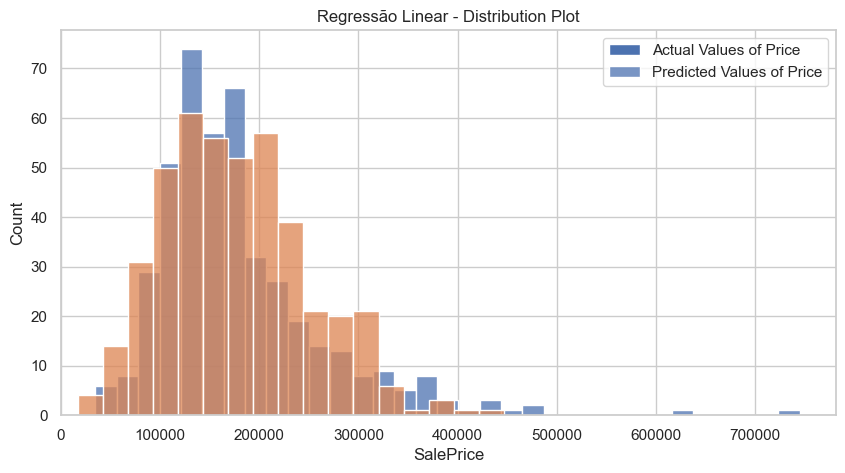

<Figure size 1200x1200 with 0 Axes>

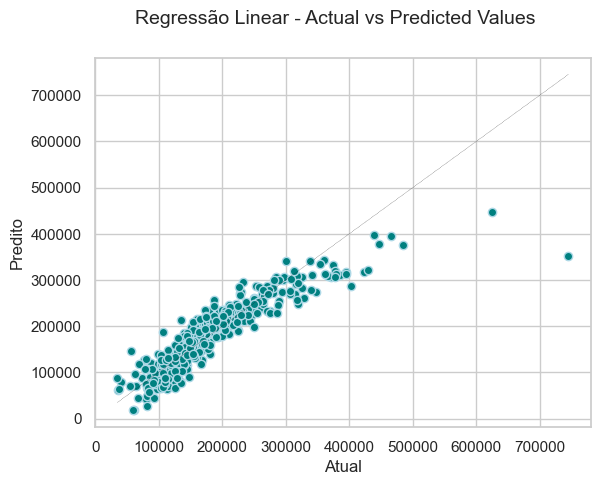

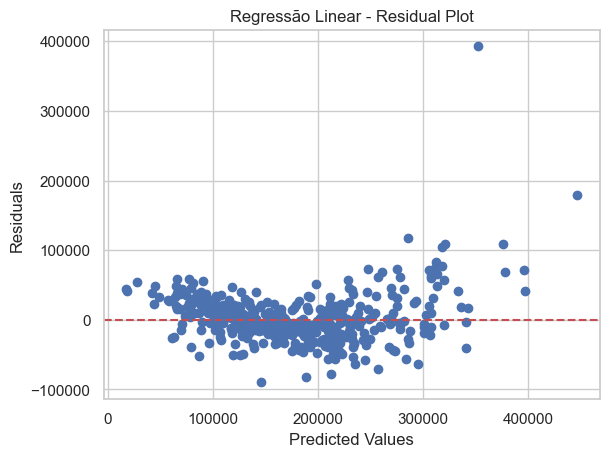


Modelo Árvore de Decisão:
Árvore de Decisão  RMSE:  40136.901954435176
Árvore de Decisão R2: 0.7743833926224978
Árvore de Decisão MAPE: 0.1549294875459387


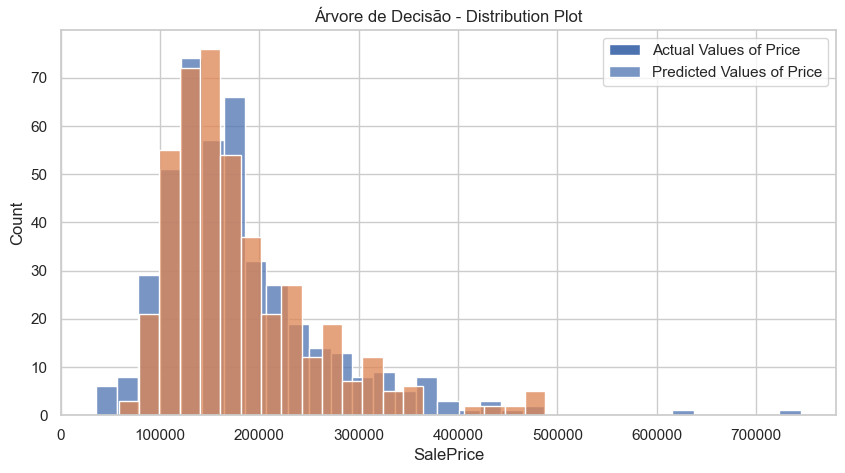

<Figure size 1200x1200 with 0 Axes>

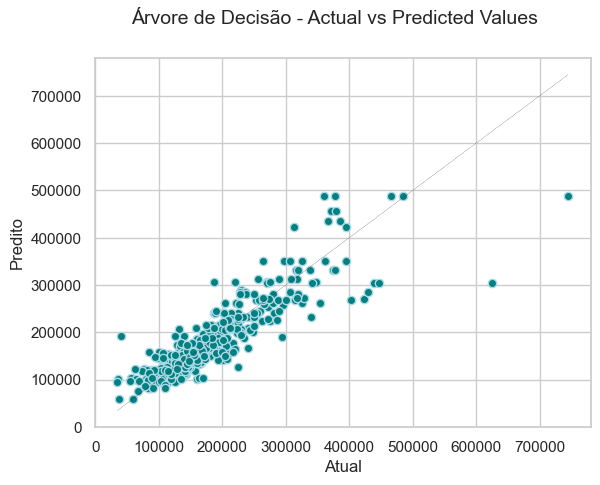

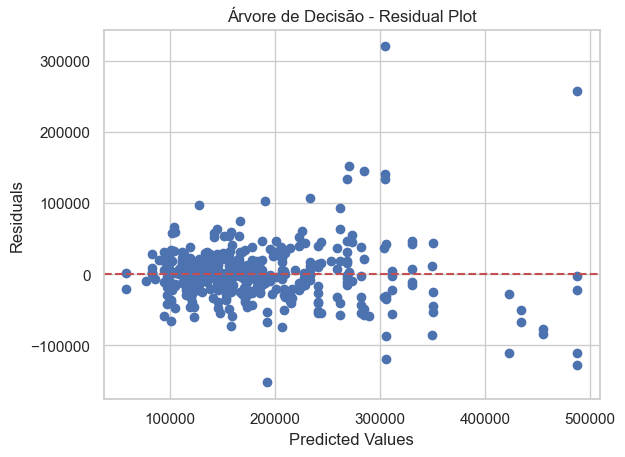


Modelo SVM:
SVM  RMSE:  34903.99797080452
SVM R2: 0.8293785145250312
SVM MAPE: 0.1290772561588597


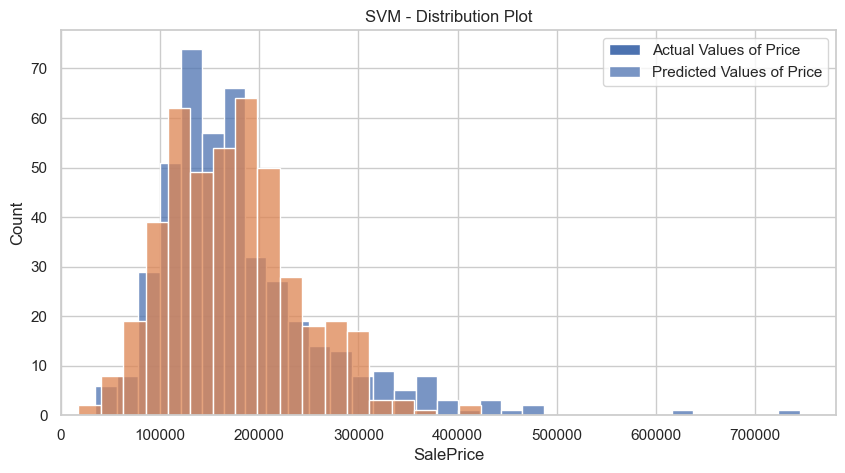

<Figure size 1200x1200 with 0 Axes>

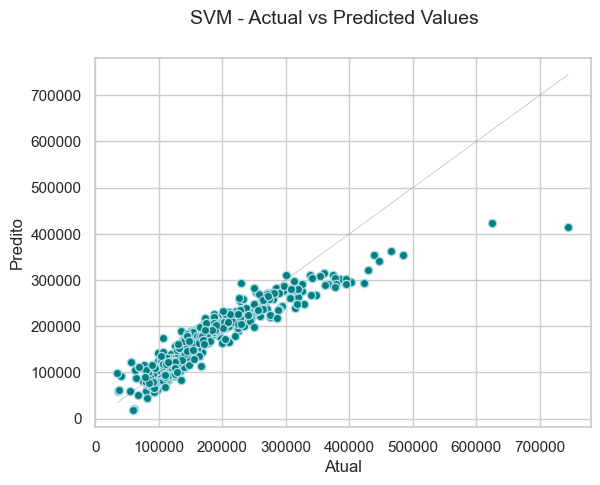

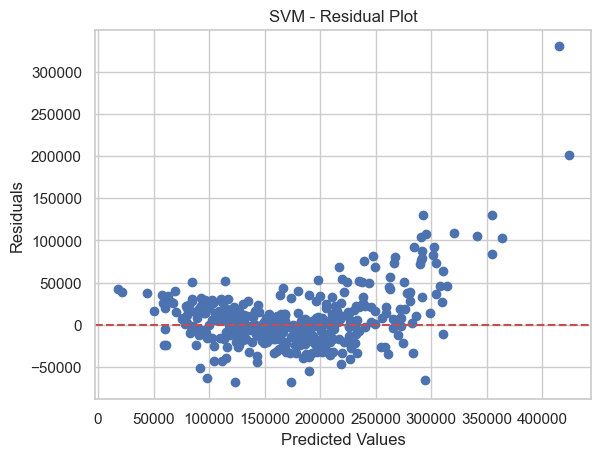


Modelo ADALINE:
ADALINE  RMSE:  48778.97321952047
ADALINE R2: 0.6667664821168906
ADALINE MAPE: 0.20535829159498606


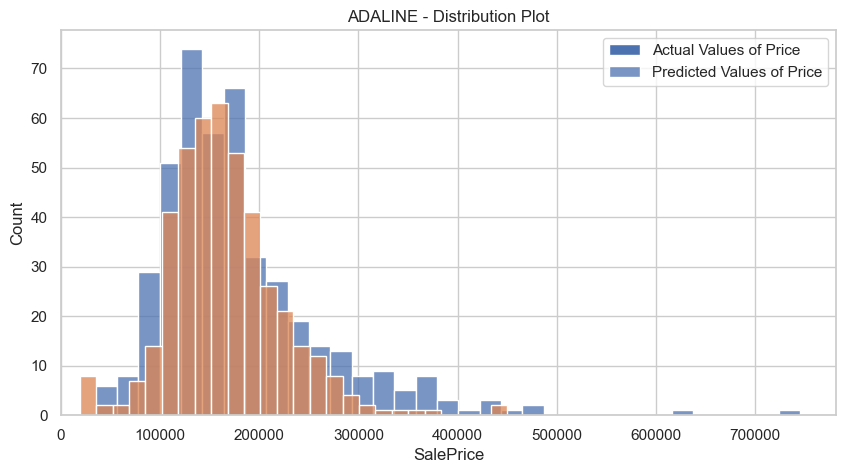

<Figure size 1200x1200 with 0 Axes>

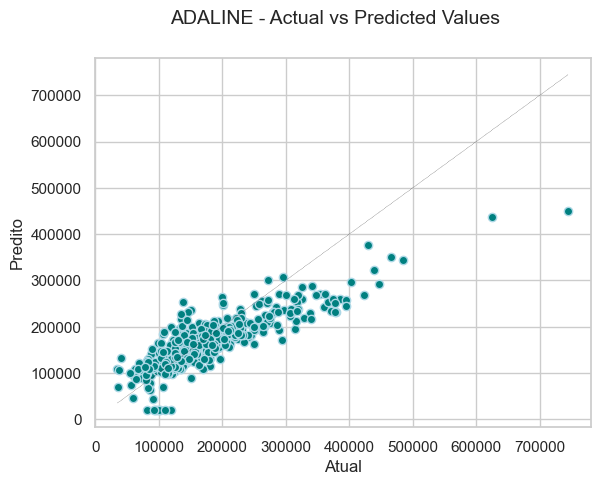

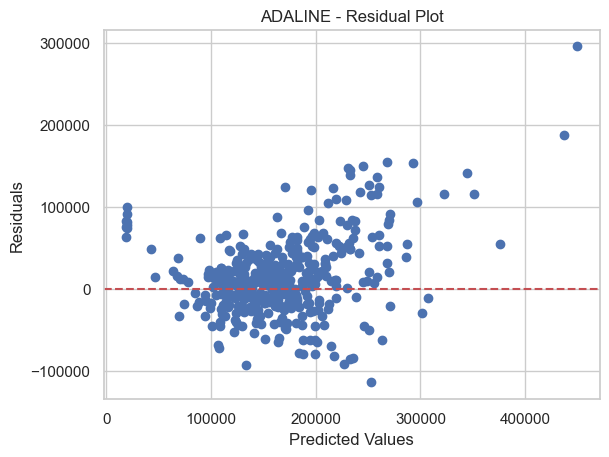


Modelo MLP:
MLP  RMSE:  40407.5070140755
MLP R2: 0.7713308995932942
MLP MAPE: 0.18358396185224835


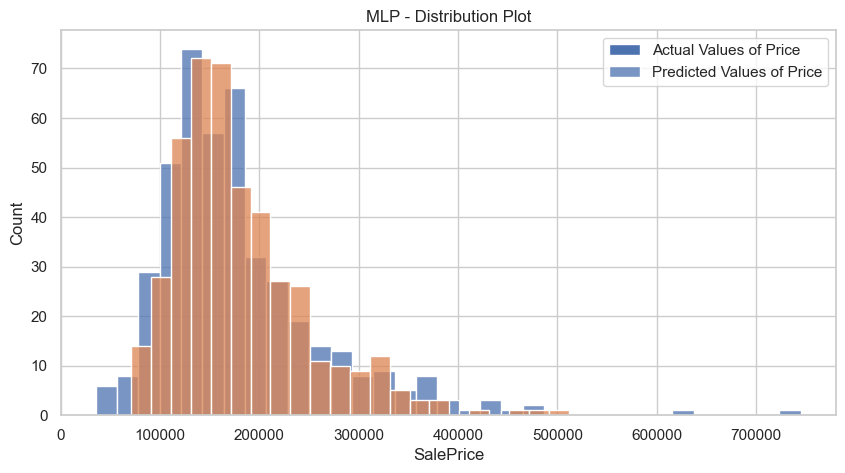

<Figure size 1200x1200 with 0 Axes>

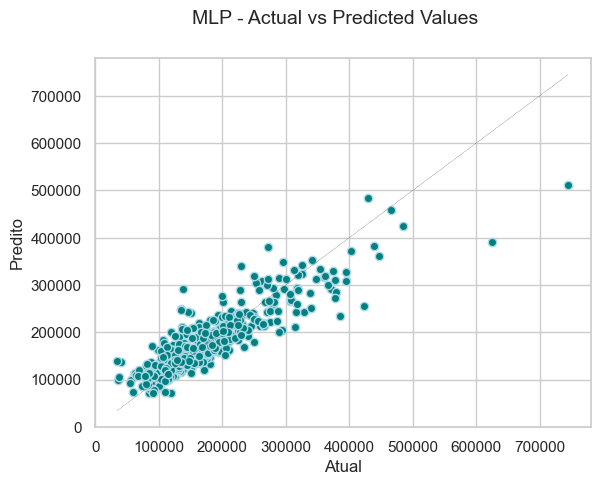

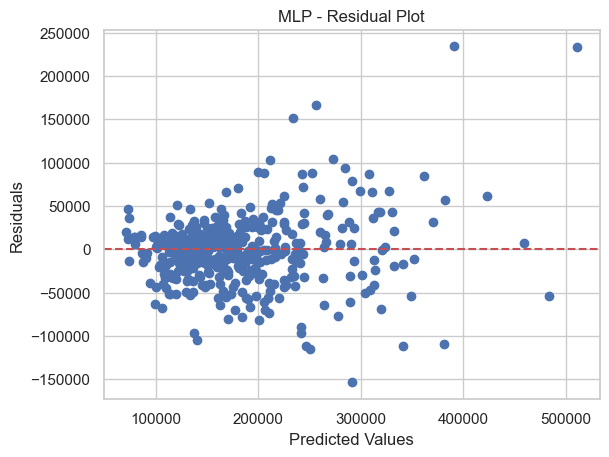


Modelo Naive Bayes:
Naive Bayes  RMSE:  54980.300973170895
Naive Bayes R2: 0.5766519193694379
Naive Bayes MAPE: 0.18584133363755376


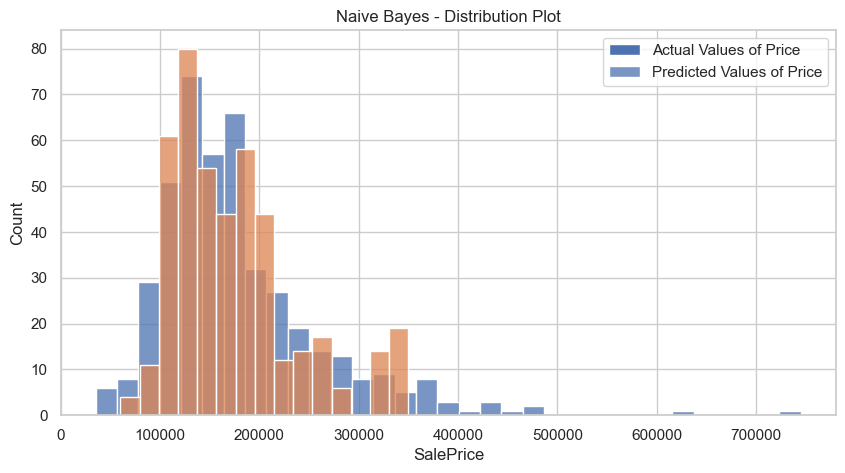

<Figure size 1200x1200 with 0 Axes>

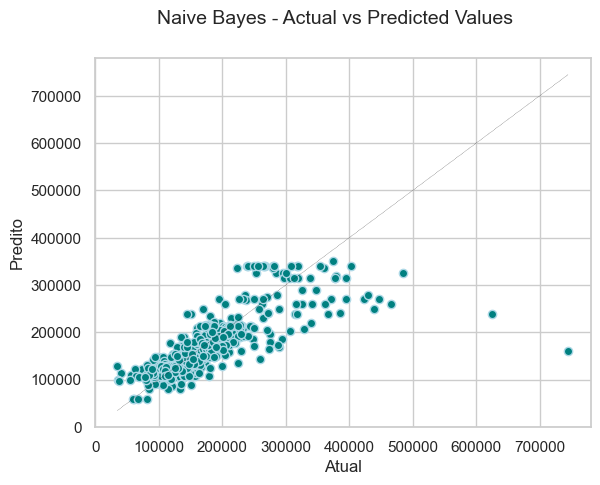

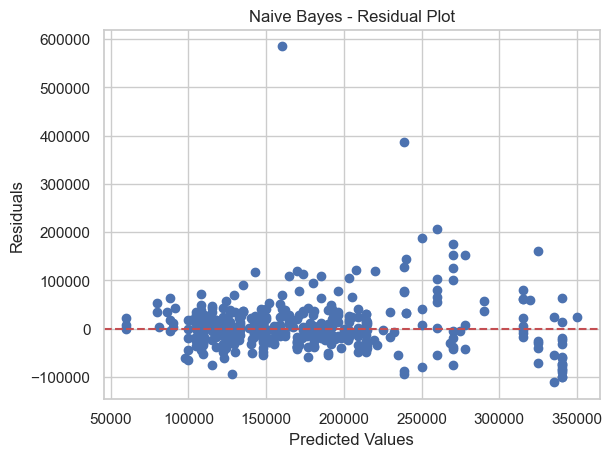

In [114]:
# avaliando
from sklearn.metrics import mean_squared_error, r2_score
from functions.actual_vs_pred_plot import actual_vs_pred_plot
from functions.model_residual_plot import model_residual_plot
from functions.regression_metrics import regression_metrics
from functions.model_dist_plot import model_dist_plot
import seaborn as sns

list_models_name = [
    "Regressão Linear",
    "Árvore de Decisão",
    "SVM",
    "ADALINE",
    "MLP",
    "Naive Bayes",
]
list_models = [LR, DTR, SVM, ADALINE, MLP, NB]
list_models_predicted = [LR_predicted, DTR_predicted, SVM_predicted, ADALINE_predicted, MLP_predicted, NB_predicted]
list_models_RMSE = []
list_models_R2 = []
list_models_MAPE = []

for i in range(0, len(list_models)):
    model_predicted = list_models_predicted[i]
    model_name = list_models_name[i]
    print("\nModelo " + model_name + ":")
    rmse, r2, mape = regression_metrics(model_predicted, test_Y,model_name)
    list_models_RMSE.append(rmse)
    list_models_R2.append(r2)
    list_models_MAPE.append(mape)

    model_dist_plot(test_Y, model_predicted, model_name)
    
    actual_vs_pred_plot(test_Y, model_predicted,model_name)

    # Create residual plot
    model_residual_plot(test_Y, model_predicted, model_name)


Comparando os valores de $MAPE$ (erro percentual absoluto médio) de cada modelo gerado, obtemos:

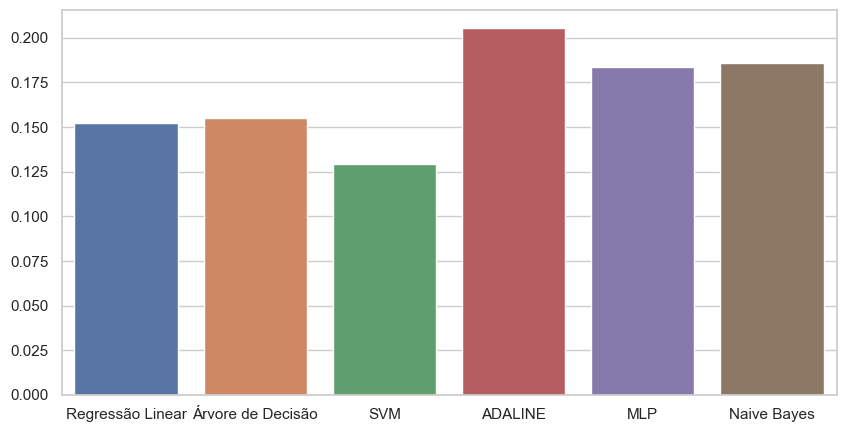

In [115]:
# comparando os modelos por MAPE:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=list_models_name, y=list_models_MAPE)

É possível perceber que SVM é o modelo que possui a menor média dos erros percentuais absolutos entre os valores preditos e os valores verdadeiros, enquanto que os modelos de Redes Neurais possuíram altas médias.

Comparando os $RMSE$ de cada modelo gerado.

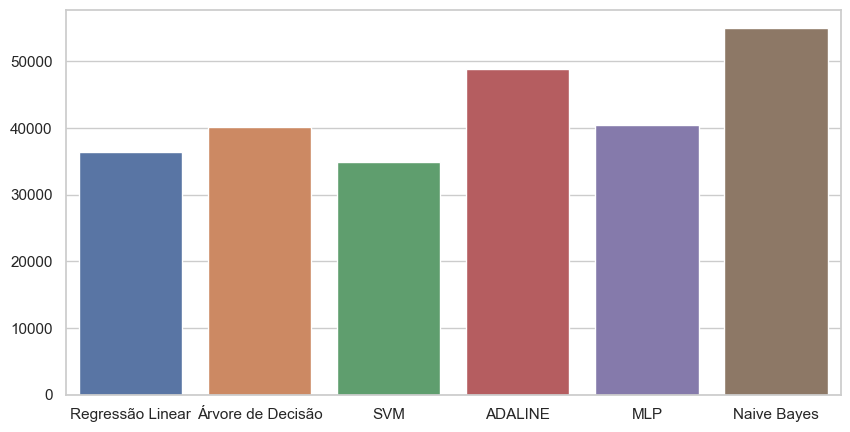

In [116]:
# comparando os modelos por RMSE:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=list_models_name, y=list_models_RMSE)

Da mesma forma, é possível perceber que Árvore de Decisão é o modelo com o menor RMSE, enquanto que novamente os modelos de redes neurais Adaline e MLP tiveram valores altos de RMSE.

Comparando os scores de $R2$ de cada modelo gerado, obtemos:

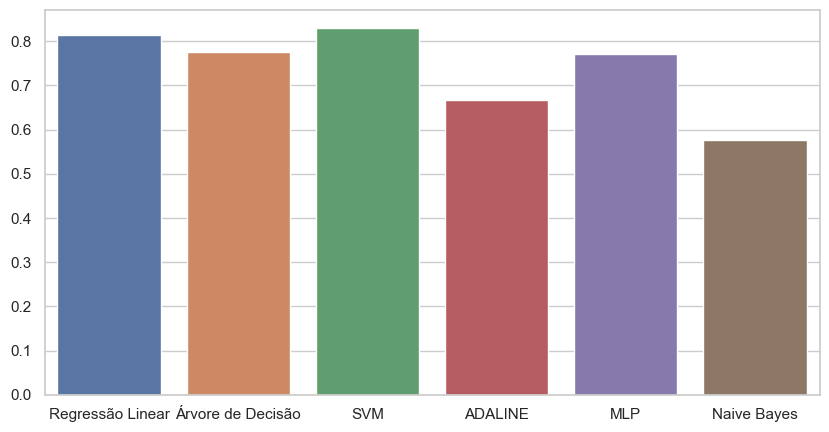

In [117]:
# comparando os modelos por R2:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=list_models_name, y=list_models_R2)

Novamente, Árvore de Decisão se destaca como o melhor modelo nesse quesito, onde quanto mais próximo de 1 é o score de R_2, melhor é o ajuste do modelo aos dados.

$ADALINE$ e $MLP$ são ambos modelos de redes neurais, sendo que a $MLP$ é mais complexa do que o $ADALINE$. Redes neurais exigem um grande volume de dados para aprender adequadamente, e podem ter desempenho abaixo do esperado se houver poucos dados de treinamento. Além disso, esses modelos podem sofrer de overfitting se não forem adequadamente configurados. Isso poderia explicar os resultados elevados de MAPE e RMSE (indicativos de erro) e baixos valores de R2 (indicativo de acurácia).

Por outro lado, o $SVM$, a $Regressão$ $Linear$ e a $Árvore$ $de$ $Decisão$ são algoritmos mais simples e menos propensos ao overfitting. O $SVM$ é especialmente conhecido por sua habilidade em lidar com espaços de alta dimensionalidade e encontrar fronteiras de decisão complexas, o que pode explicar por que ele tem o menor MAPE. No entanto, isso não significa necessariamente que ele terá o menor RMSE ou o maior R2, já que essas métricas avaliam aspectos ligeiramente diferentes do modelo. O fato de a $Árvore$ $de$ $Decisão$ ter o menor RMSE e o maior R2 pode indicar que ela está fazendo um bom trabalho de generalização.

O $Naive$ $Bayes$ faz uma suposição de independência entre os atributos que raramente é verdadeira na prática, o que pode limitar sua acurácia. Se os atributos em seus dados são altamente correlacionados (como muitas vezes acontece em dados de imóveis), isso poderia explicar por que o $Naive$ $Bayes$ não tem desempenho tão bom quanto os outros modelos, mas ainda assim é melhor do que o $ADALINE$ e o $MLP$.

Portanto, seguindo a métrica de _Root Mean Squared Error_ como a principal para fazer seleção dos modelos, o melhor modelo foi:

In [118]:
model_index = np.argmin(list_models_RMSE)
model_name = list_models_name[model_index]
model_predicted = list_models_predicted[model_index]
print("\nModelo com melhor R2: " + model_name)
print("MAPE: " + str(list_models_MAPE[model_index]))
print("RMSE: " + str(list_models_RMSE[model_index]))
print("R2: " + str(list_models_R2[model_index]))


Modelo com melhor R2: SVM
MAPE: 0.1290772561588597
RMSE: 34903.99797080452
R2: 0.8293785145250312


In [119]:
# from sklearn.impute import SimpleImputer

# melhor_modelo = list_models[model_index]

# validate_columns = features_correlated.drop(['SalePrice'])
# validate_df = test[validate_columns]

# # Eliminate these lines after - Preprocess the data to handle missing values
# # imputer = SimpleImputer(strategy='mean')
# # validate_df = pd.DataFrame(imputer.fit_transform(validate_df), columns=validate_columns)

# validate = validate_df.copy()
# validate['SalePrice'] = melhor_modelo.predict(validate_df)

# # validate

# predicted_sale_price = validate
# predicted_sale_price.to_csv("SalePrice_predicted.csv", index=False)
# predicted_sale_price.head()

# Implementando Pipelines e Validação cruzada

# Considerações finais